# Analysing the wokeness of the film industry

### ___Study of the representation of ethnic diversity in the film industry___
This notebook resumes the work and data-pipeline achieved for Milestone 3. Milestone 2 is not provided in this notebook. 

The beginning of this Notebook consists of data processing and lodgin and extracts the main figures which were asked to analyse in the feedback of milestone 2. The rest addresses a deeper analysis on the datasets.

# Table of contents
1. [Libraries](#introduction)
2. [Import of datasets](#paragraph1)
    1. [Import of the character dataset](#subparagraph1)
    2. [Import of the movie dataset](#subparagraph2)
    3. [Merging the two datasets](#subparagraph3)
3. [Data overview](#paragraph2)
    1. [Number of movies over time](#subparagraph4)
    2. [Number of movies by country over time](#subparagraph5)
4. [How is ethnic diversity represented in each country's film industry?](#paragraph3)
    1. [China](#subparagraph6)
    2. [United State of America](#subparagraph7) 
    3. [India](#subparagraph8)
    4. [Europe](#subparagraph9)
       1. [UK](#subsubparagraph1)
       2. [France](#subsubparagraph2)
       3. [Germany](#subsubparagraph3)
    5. [Top 100 movies](#subparagraph10)
    6. [Interactive plot](#subparagraph11)
5. [Diversity score](#paragraph4)
    1. [Entropy](#subparagraph12)
    1. [Simpson index](#subparagraph13)
       1. [Bootstrap resampling](#subsubparagraph1)
       2. [Heatmap of p_value](#subsubparagraph2)
6. [Correlation between success and actors diversity](#paragraph5)
   1. [Obsertionnal study](#subparagraph14)
   2. [Linear regression](#subparagraph15)
7. [Correlation between gender and actors diversity](#paragraph6)
   1. [Gender proportion vizualization](#subparagraph16)
   2. [t_test](#subparagraph17)
8. [Sentimental analysis](#paragraph7)
   1. [Score on summary](#subparagraph18)
   2. [Linear regression](#subparagraph19)

# 1. Libraries <a name="introduction"></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import ast
from datetime import datetime
from country_list import countries_for_language
countries_list = dict(countries_for_language('en'))

#statistical testing
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikits.bootstrap as boot
from statsmodels.stats import diagnostic
from scipy import stats
from scipy.stats import kruskal
from statistics import mean
from scipy.stats import sem, t

#Path
data_folder = './data/'

# 2. Import of datasets <a name="paragraph1"></a>

First, we import the mapping from ethnicity ID to ethnicity (see `mapping.ipynb`).

In [239]:
fname = 'mapping.pickle'
mapping = pickle.load(open(fname,'rb'))

Now we group the ethnicities in different clusters. The classification is done according to https://www.ethnicity-facts-figures.service.gov.uk/style-guide/ethnic-groups (census UK gov) and https://www.census.gov/newsroom/blogs/random-samplings/2021/08/measuring-racial-ethnic-diversity-2020-census.html (census US gov).

In [240]:
asian = ['/m/019kn7','/m/01xhh5','/m/03bx0k4','/m/0d2by','/m/0cn68','/m/01336l','/m/02p1pl6','/m/071x0k','/m/0bzkm2','/m/04czx7','/m/01j2qv','/m/0f0gt_','/m/03295l']
southasian = ['/m/0dryh9k','/m/01rv7x','/m/02sch9','/m/04mvp8','/m/0bpjh3','/m/0cqgdq','/m/09m6hr','/m/0g0x7_','/m/023mqw','/m/0583cz','/m/0cmdl5l','/m/029f2r','/m/04gfy7','/m/0bymc','/m/075_n6','/m/046cwm','/m/09743','/m/0bhsnb','/m/048sp5','/m/02y_9mh','/m/08cjt2','/m/0cm7w1','/m/0fqp6zk','/m/0dllcfn','/m/04jq32s','/m/01kg2v','/m/0222hg','/m/0bs7l_v','/m/052r3t','/m/06lshc','/m/01xttr','/m/04nrnz','/m/078vc']
black = ['/m/0x67','/m/09v5bdn','/m/04dbw3','/m/0gkxl2','/m/05g0f1']
latino = ['/m/01g7zj','/m/025rpb0','/m/09k5jvk','/m/09gk_6h']
mixed = ['/m/04y8_bm']
white = ['/m/041rx','/m/02w7gg','/m/033tf_','/m/0xnvg','/m/02ctzb','/m/07hwkr','/m/07bch9','/m/044038p','/m/03bkbh','/m/0d7wh','/m/03ts0c','/m/0222qb','/m/03lmx1','/m/065b6q','/m/01qhm_','/m/048z7l','/m/06mvq','/m/0g8_vp','/m/09vc4s','/m/013xrm','/m/06gbnc','/m/07mqps','/m/02g7sp','/m/0g96wd','/m/063k3h','/m/042gtr','/m/09kr66','/m/03ttfc','/m/038723','/m/08hpk0','/m/022dp5','/m/03vv99','/m/0cnvdq1','/m/06v41q','/m/05l3g_','/m/0268_k','/m/0dqqwy','/m/0bbz66j','/m/02rbdlq','/m/0fqz6','/m/0bkbz','/m/0g6ff','/m/027n1m6','/m/03w9bjf','/m/013b6_','/m/0h2138','/m/02jvpv','/m/02vsw1','/m/013s3n','/m/04q7gbh','/m/09zyn5','/m/0fj1k9','/m/04f581','/m/0ffjqy','/m/06j2v','/m/0ffkb4','/m/0g5y6','/m/0268d21','/m/03gskx0','/m/019lrz','/m/02p4q5p','/m/0ffhz3','/m/04mmhj','/m/0dj8k3','/m/0ffjvd','/m/033njm','/m/0g48m4','/m/022fdt','/m/012c1l','/m/0bfjm7','/m/04ydrsn','/m/03cbkrf','/m/09cqth','/m/025_0f0','/m/05sf2x','/m/09vmyh','/m/01p7s6','/m/017sq0','/m/067lts','/m/02qv_h_','/m/013b7g','/m/018s6c','/m/067lrj','/m/09gp4']
other = ['/m/0432mrk','/m/0dbxy','/m/059_w','/m/032j30','/m/05748','/m/01trsl']
ethn_groups = {'Asian_ex_Southasian': asian, 'Southasian': southasian, 'Black/Caribbean/African': black, 'Latino': latino, 'Mixed': mixed, 'White': white, 'Other': other}

## A. Import of the character dataset <a name="subparagraph1"></a>

In this project, we are going to work on the representation of the ethnicity in movies from different datasets. We have approximately 450 000 characters aligned in the file `'character.metadata.tsv'` which was extracted on November 4, 2012 from freebase. It is the main data that we are going to use, as it contains the ID of the ethnicity. We are only going to keep 9 features, as the other features are not useful for our analysis. We will also drop the characters with unspecified ethnicity. Data after 2012 will be removed as our data is extracted from 1920 to 2012 and we don't have enough movies for 2012 (see Milestone2 notebook). 

In [241]:
data1 = pd.read_csv(data_folder + 'character.metadata.tsv', sep='\t', header=None)

def format_attr(df):
    '''
    Create a new dataframe with all attributes
    formatted according to the character data set'
    :param dataframe: pandas.DataFrame
    :return: new dataframe
    '''
    
    formatted_df = pd.DataFrame()
    formatted_df['wikipedia_id'] = df[df.columns[0]].astype(int)
    formatted_df['freebase_movie_id'] = df[df.columns[1]].astype(str)
    
    formatted_df['date'] = df[df.columns[2]]
    formatted_df['date'] = pd.to_datetime(formatted_df['date'])
    formatted_df['date'] = pd.DatetimeIndex(formatted_df['date']).year
    
    formatted_df['character_name'] = df[df.columns[3]].astype(str)
    formatted_df['gender'] = df[df.columns[5]].astype(str)
    formatted_df['ethnicity'] = df[df.columns[7]].astype(str)
    formatted_df['name'] = df[df.columns[8]].astype(str, errors='ignore')
    formatted_df['age'] = df[df.columns[9]].astype(int, errors='ignore')
    formatted_df['freebase_actor_character_id'] = df[df.columns[10]].astype(str)
    formatted_df['freebase_actor_id'] = df[df.columns[12]].astype(str)
    formatted_df['freebase_character_id'] = df[df.columns[11]].astype(str)
    
    return formatted_df

data1 =  data1[data1[data1.columns[7]].notna()]
charac_data = format_attr(data1)

#sort by datetime of movie and remove data before 1920 and after 2012
charac_data = charac_data.sort_values(by='date')
charac_data = charac_data[charac_data.date > 1919]
charac_data = charac_data[charac_data.date < 2013]
charac_data.head()

,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id
367369,13050320,/m/02z4n3m,1920.0,nan,M,/m/07bch9,Oliver Hardy,NaN,/m/040k1r4,/m/0lh0c,nan
216697,5555565,/m/0dsbmv,1920.0,nan,F,/m/03vv99,Louise Keaton,13.0,/m/040sm8h,/m/03mdkgk,nan
167280,13050489,/m/02z4n6q,1920.0,nan,M,/m/07bch9,Oliver Hardy,NaN,/m/040k1rq,/m/0lh0c,nan
240919,31709439,/m/0bbr0cd,1920.0,Ruth Sawyer,F,/m/02ctzb,Norma Talmadge,NaN,/m/0n9mrpz,/m/042kxg,/m/0n9mrp8
267248,7036620,/m/0h1dzd,1920.0,nan,F,/m/03bkbh,Moyna MacGill,NaN,/m/02vbbqd,/m/0h1gw0,nan


We keep the following features for our first data set:

`wikipedia_id` : Wikipedia movie ID \
`freebase_movie_id` :  Freebase movie ID \
`date` :  Movie release date \
`wikipedia_id` : Character name \
`gender` : Actor gender \
`ethnicity` : Actor ethnicity (Freebase ID) \
`name` : Actor name \
`freebase_character_id` : Freebase character ID \
`freebase_actor_id` : Freebase actor ID

To get a sense of the main feature we want to investigate, we can look at the dataset and see how many actors of which ethnicities are included.

In [242]:
population_per_ethnicity = charac_data['ethnicity'].value_counts()

ethnicities = population_per_ethnicity.keys().map(mapping)
df_occurences = pd.DataFrame(ethnicities, columns=['Ethnicity'])
df_occurences['ID'] = population_per_ethnicity.index
df_occurences['Occurence'] = population_per_ethnicity.values

print(f"We keep only {len(charac_data)} samples.")
print(f"We can see the occurence of each of the {len(population_per_ethnicity)} ethnicity:")
df_occurences

We keep only 101809 samples.
We can see the occurence of each of the 476 ethnicity:


,Ethnicity,ID,Occurence
0,Indians,/m/0dryh9k,15449
1,African Americans,/m/0x67,9979
2,Jewish people,/m/041rx,9764
3,English people,/m/02w7gg,5996
4,Irish Americans,/m/033tf_,3798
...,...,...,...
471,Bohemian,/m/01hm_,1
472,Thai people,/m/07wsyr,1
473,Bangladeshi American,/m/08j1fb,1
474,Goans,/m/026d074,1


As we can see, the dataset contains 476 different ethnicities, with the first few representing the vast majority; many ethnicities have only one actor in the dataset. Because the distribution is heavy tailed, ethnicities are represented below with a log axis.

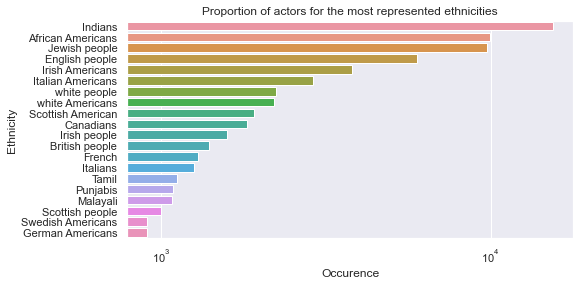

In [243]:
# plot of ethnicities occurences    
popular_ethn=df_occurences[0:20]
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.barplot(x = popular_ethn['Occurence'], y = popular_ethn['Ethnicity']).set(title='Proportion of actors for the most represented ethnicities', xscale='log')

## B. Import of the movie dataset <a name="subparagraph2"></a>

We are also going to import the file `'movie.metadata'` and we are going to merge with the previous dataframe. This new dataframe will contain several more features, like the countries of the movies and the revenue.

In [244]:
data2 = pd.read_csv(data_folder + 'movie.metadata.tsv', sep='\t', header=None)
def format_attr2(df):
    '''
    Create a new dataframe with all attributes
    formatted according to the character data set'
    :param dataframe: pandas.DataFrame
    :return: new dataframe
    '''
    formatted_df = pd.DataFrame()
    formatted_df['wikipedia_id'] = df[df.columns[0]].astype(int)
    formatted_df['movie_name'] = df[df.columns[2]].astype(str)    
    formatted_df['revenue'] = df[df.columns[4]].astype(int, errors='ignore')
    formatted_df['runtime'] = df[df.columns[5]].astype(int, errors='ignore')
    formatted_df['movie_languages'] = df[df.columns[6]].astype(str)
    formatted_df['movie_countries'] = df[df.columns[7]]
    formatted_df['movie_genres'] = df[df.columns[8]].astype(str)
    
    return formatted_df

movie_data = format_attr2(data2)
movie_data.head()

,wikipedia_id,movie_name,revenue,runtime,movie_languages,movie_countries,movie_genres
0,975900,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


We keep the following features for our second data set:

`wikipedia_id` : Wikipedia movie ID \
`movie_name` :  Name of the movie \
`revenue` :  Box office revenue \
`runtime` : Duration of the movie \
`movie_languages` : Languages of the movie \
`movie_countries` : Differents countries of production  \
`movie_genres` : Genres classification 

## C. Merging the two datasets <a name="subparagraph3"></a>

In [245]:
#keep only the characters with known id and merge the two datasets
movie_data = movie_data[movie_data['wikipedia_id'].isin(charac_data['wikipedia_id'])]
merged_data = pd.merge(charac_data, movie_data, left_on='wikipedia_id', right_on='wikipedia_id', how = 'left')
merged_data.head()

,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id,movie_name,revenue,runtime,movie_languages,movie_countries,movie_genres
0,13050320,/m/02z4n3m,1920.0,nan,M,/m/07bch9,Oliver Hardy,NaN,/m/040k1r4,/m/0lh0c,nan,Pals and Pugs,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
1,5555565,/m/0dsbmv,1920.0,nan,F,/m/03vv99,Louise Keaton,13.0,/m/040sm8h,/m/03mdkgk,nan,Convict 13,NaN,25.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
2,13050489,/m/02z4n6q,1920.0,nan,M,/m/07bch9,Oliver Hardy,NaN,/m/040k1rq,/m/0lh0c,nan,Springtime,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
3,31709439,/m/0bbr0cd,1920.0,Ruth Sawyer,F,/m/02ctzb,Norma Talmadge,NaN,/m/0n9mrpz,/m/042kxg,/m/0n9mrp8,The Branded Woman,NaN,84.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra..."
4,7036620,/m/0h1dzd,1920.0,nan,F,/m/03bkbh,Moyna MacGill,NaN,/m/02vbbqd,/m/0h1gw0,nan,Nothing Else Matters,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01t_vv"": ""Comedy-drama""}"


Here we get the data merged between character data and movie data.
From this data set, we want to see which country has the most diversity.

# 3. Data overview <a name="paragraph2"></a>

## A. Proportion of different ethnicities over time <a name="subparagraph4"></a>

Let's try to clean the `movie_countries` feature to obtain a clean array : 

In [246]:
# function to change the movie countries feature in a list 
def map_to_country(row, pick_one=False):
    vals = list(ast.literal_eval(row.movie_countries).values())
    pick_one = False if not vals else pick_one
    return vals if not pick_one else [vals[0]]

df_country = merged_data.copy()
df_country["movie_countries"] = df_country.apply(lambda x: map_to_country(x, False), axis =1)

df_country.sample(5)

,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id,movie_name,revenue,runtime,movie_languages,movie_countries,movie_genres
24983,11448183,/m/02rc_h4,1984.0,Bindiya,F,/m/0dryh9k,Rekha Ganesan,29.0,/m/02tbhjj,/m/06wvfq,/m/0h8k4_h,Bindiya Chamkegi,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}",[India],"{""/m/0hqxf"": ""Family Film"", ""/m/01z4y"": ""Comedy""}"
28769,12456476,/m/02w6ry2,1987.0,Raymond Escobar,M,/m/041rx,Jerry Stiller,59.0,/m/052d24b,/m/01jz6x,/m/0h36nt7,Nadine,5669831.0,95.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/0lsxr"": ""Crime Fiction"", ""/m/06cvj"": ""Rom..."
55329,4832987,/m/0cq3rw,2000.0,Frederick Crestwell,M,/m/0dj8k3,Stephen Fry,42.0,/m/02nv3n4,/m/0h0yt,/m/0n3jyg3,Relative Values,NaN,89.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""..."
65326,1380482,/m/04y27b,2003.0,Gabriella,F,/m/09v5bdn,Roselyn Sanchez,29.0,/m/02vcxh8,/m/03mkhc,/m/0c04y9y,Boat Trip,15020293.0,97.0,"{""/m/02h40lc"": ""English Language""}","[United States of America, Germany]","{""/m/0hn10"": ""LGBT"", ""/m/06cvj"": ""Romantic com..."
96528,28293855,/m/0cnxxy3,2011.0,Yamini Punjwani,F,/m/0dryh9k,Ira Dubey,26.0,/m/0h1g8p5,/m/0cnxv_h,/m/0h1g8p7,Turning 30,NaN,120.0,{},[India],"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""..."


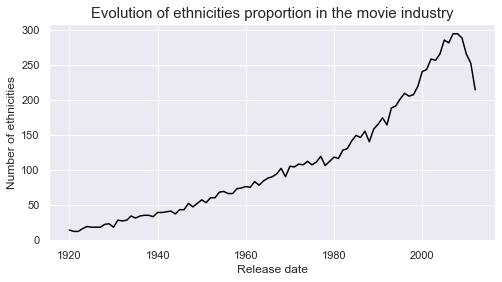

In [247]:
#plot the ethnicities representation from 1920 to 2012
date_charac = df_country.groupby(df_country['date']).apply(lambda x: pd.Series({
        'num_of_ethnicity': x['ethnicity'].nunique(),
        'num_of_movies' : x['movie_name'].nunique()
    }))

plt.plot(date_charac.index, date_charac.num_of_ethnicity, color = 'black')
plt.title('Evolution of ethnicities proportion in the movie industry', fontsize=15)
plt.ylabel('Number of ethnicities')
plt.xlabel('Release date')
plt.show()

We want to see if this evolution is reliable or if it is skewed by the database we have : 


`Milestone 2 feedback` : It would have been good to do some preliminary analysis whether the representation of ethnicities changes over time. You have the plot “evolution of representation of ethnicity”, but this might be influenced heavily by the database only having old american movies, but not old indian movies (or similar selection biases). You should check for what timeframe you have sufficient data to compare countries and ethnicities.

> ***NOTE :***
First, our dataset of movie and character data frequently contains multiple countries. To use it in document classification, we must first create a new dataset organized by country. We simply increase the number of rows for each row with two or more movie countries by copying all other information and replacing the nation as a single variable.

In [248]:
# First we make a list of all the countries in the data 
countries = []
for values in df_country['movie_countries'] : 
    for value in values: 
        if value not in countries: 
            countries.append(value) 

# Convert the multiple countries in column in a multiple rows (duplication of the row for each the multiples movie_countries)
dft = df_country.explode('movie_countries')
dft = dft.reset_index()
dft.drop_duplicates(subset='freebase_movie_id', keep='first')
print(f"The dataset is composed now of {len(dft)} differents rows which is {round(len(dft)/len(merged_data), 2)} higher than the first dataset with multiplie countries by movie.")

The dataset is composed now of 127462 differents rows which is 1.25 higher than the first dataset with multiplie countries by movie.


## B. Number of movies by country over time <a name="subparagraph5"></a>

In [249]:
#get dataframe with ethnicity name and the group
ethn_by_nActors = charac_data['ethnicity'].value_counts()

ethn = pd.DataFrame()
ethn['ID'] = ethn_by_nActors.keys()
ethn['#Actors'] = ethn_by_nActors.values
ethn['Ethnicity'] = ethn_by_nActors.keys().map(mapping)

merged = pd.merge(dft, ethn, left_on='ethnicity', right_on='ID', how = 'left')
merged = merged.drop(['ID','#Actors','runtime'], axis= 1)

aaa = pd.DataFrame(ethn_groups.items(), columns = ['groups','ethnicity'])

# Convert the multiple ethnicity in column in a multiple rows (duplication of the row for each if multiple ethnicities for an actor)
ethngr = aaa.explode('ethnicity')
ethngr

#merge with previous dataset
merged = pd.merge(merged, ethngr, left_on='ethnicity', right_on='ethnicity', how = 'left')
merged.head()

,index,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id,movie_name,revenue,movie_languages,movie_countries,movie_genres,Ethnicity,groups
0,0,13050320,/m/02z4n3m,1920.0,nan,M,/m/07bch9,Oliver Hardy,NaN,/m/040k1r4,/m/0lh0c,nan,Pals and Pugs,NaN,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",Scottish American,White
1,1,5555565,/m/0dsbmv,1920.0,nan,F,/m/03vv99,Louise Keaton,13.0,/m/040sm8h,/m/03mdkgk,nan,Convict 13,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...",United States of America,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",British Americans,White
2,2,13050489,/m/02z4n6q,1920.0,nan,M,/m/07bch9,Oliver Hardy,NaN,/m/040k1rq,/m/0lh0c,nan,Springtime,NaN,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",Scottish American,White
3,3,31709439,/m/0bbr0cd,1920.0,Ruth Sawyer,F,/m/02ctzb,Norma Talmadge,NaN,/m/0n9mrpz,/m/042kxg,/m/0n9mrp8,The Branded Woman,NaN,{},United States of America,"{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",white people,White
4,4,7036620,/m/0h1dzd,1920.0,nan,F,/m/03bkbh,Moyna MacGill,NaN,/m/02vbbqd,/m/0h1gw0,nan,Nothing Else Matters,NaN,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"{""/m/01t_vv"": ""Comedy-drama""}",Irish people,White


> ***NOTE :***
First, we will examine the number of films produced in the two major film producing countries: `India`  and the `United States`.

In [265]:
#dataframe containing only movies from the USA
df_usa = merged[merged['movie_countries'] == 'United States of America' ]

#dataframe containing only movies from India
df_india = merged[merged['movie_countries'] == 'India' ]

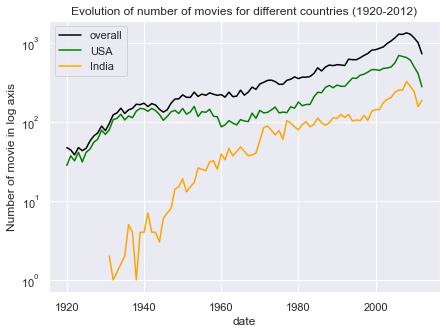

In [250]:
date_charac = merged.groupby(merged['date']).apply(lambda x: pd.Series({
        'num_of_ethnicity': x['ethnicity'].nunique(),
        'num_of_movies' : x['movie_name'].nunique()
    }))

date_charac_usa = df_usa.groupby(df_usa['date']).apply(lambda x: pd.Series({
        'num_of_movies': x['movie_name'].nunique(),
    }))

date_charac_india = df_india.groupby(df_india['date']).apply(lambda x: pd.Series({
        'num_of_movies': x['movie_name'].nunique(),
    }))
plt.figure(figsize=(7,5)) 

plt.plot(date_charac.index, date_charac.num_of_movies, color = 'black', label = 'overall')
plt.plot(date_charac_usa.index, date_charac_usa.num_of_movies, color = 'green', label = 'USA')
plt.plot(date_charac_india.index, date_charac_india.num_of_movies, color = 'orange', label = 'India')

plt.legend(loc="upper left")
plt.title('Evolution of number of movies for different countries (1920-2012)')
plt.ylabel('Number of movie in log axis')
plt.yscale('log')
plt.xlabel('date')
plt.show()


---
**Conclusion**

The timeline is not good because we can see that Indian movies are only represented after 1930, and they are also much less present in the dataset until 1960-1970.

---

> ***NOTE :***
Thus, we can try to look at the data after 1970. 

In [257]:
df_country_1970 = merged[merged['date'] > 1969]
charac_data_1970 = charac_data[charac_data['date'] > 1969]

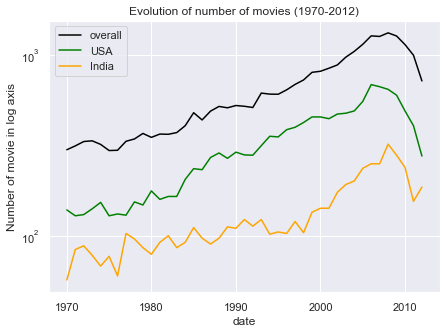

In [258]:
df_usa_1970 = df_country_1970[df_country_1970['movie_countries'] == 'United States of America' ]
df_india_1970 = df_country_1970[df_country_1970['movie_countries'] == 'India' ]

date_charac_1970 = df_country_1970.groupby(df_country_1970['date']).apply(lambda x: pd.Series({
        'num_of_ethnicity': x['ethnicity'].nunique(),
        'num_of_movies' : x['movie_name'].nunique()
    }))

date_charac_usa_1970 = df_usa_1970.groupby(df_usa_1970['date']).apply(lambda x: pd.Series({
        'num_of_movies': x['movie_name'].nunique(),
    }))

date_charac_india_1970 = df_india_1970.groupby(df_india_1970['date']).apply(lambda x: pd.Series({
        'num_of_movies': x['movie_name'].nunique(),
    }))
plt.figure(figsize=(7,5)) 
plt.plot(date_charac_1970.index, date_charac_1970.num_of_movies, color = 'black', label = 'overall')
plt.plot(date_charac_usa_1970.index, date_charac_usa_1970.num_of_movies, color = 'green', label = 'USA')
plt.plot(date_charac_india_1970.index, date_charac_india_1970.num_of_movies, color = 'orange', label = 'India')

plt.legend(loc="upper left")
plt.title('Evolution of number of movies (1970-2012)')
plt.ylabel('Number of movie in log axis')
plt.yscale('log')
plt.xlabel('date')
plt.show()


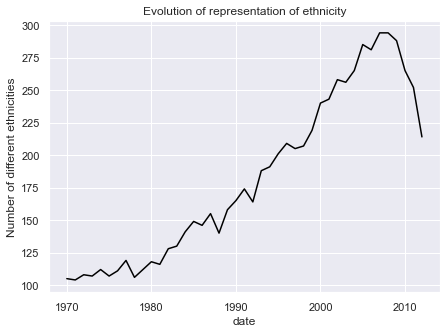

In [259]:
#plot of ethnicity representation from 1970 to 2012

date_charac_1970 = df_country_1970.groupby(df_country_1970['date']).apply(lambda x: pd.Series({
        'num_of_ethnicity': x['ethnicity'].nunique(),
        'num_of_movies' : x['movie_name'].nunique()
    }))
plt.figure(figsize=(7,5)) 
plt.plot(date_charac_1970.index, date_charac_1970.num_of_ethnicity, color = 'black')

plt.title('Evolution of representation of ethnicity')
plt.ylabel('Number of different ethnicities')
plt.xlabel('date')
plt.show()

---
**Conclusion**

We have a much better representation of the data set after 1970, with the same proportion of Indians and Americans in each period; we will use this time frame for the rest of our analysis. 

---

# 4.How is ethnic diversity represented in each country's film industry?<a name="paragraph3"></a> 
Looking deeper in the dataset for various geographic areas : `US`, `China`, `India`,`Europe`. 

`Milestone 2 feedback` : I don’t understand why you decided to limit your analysis to 9 ethnicities. In the US we might see a shift that films increasingly include black, or asian actors. But there might be similar phenomena in very different markets. China for example, does the representation of Japanese people change? Or in India, how is the distribution between the ethnicities in this country (particularly the representation of Pakistani actors might be interesting).

## A. China <a name="subparagraph6"></a>

In [268]:
#dataframe containing only movies from the USA
df_china = df_country_1970[df_country_1970['movie_countries']== 'China']
num_movie_china = df_china['movie_name'].nunique()
print("We have a sample of " + str(num_movie_china) + " movies produced in the USA from 1970 to 2012.")

We have a sample of 217 movies produced in the USA from 1970 to 2012.


---
There aren't enough films to draw any conclusions or conduct a thorough analysis. 

---

## B. USA <a name="subparagraph7"></a>

In [263]:
num_movie_usa = df_usa['movie_name'].nunique()
print("We have a sample of " + str(num_movie_usa) + " movies produced in the USA from 1970 to 2012.")

We have a sample of 18159 movies produced in the USA from 1970 to 2012.


In [264]:
#consider only the ethnicity present more than 'x' times. We consider only movies from usa, so we can begin from 1900.
x= 50

#sheach for the top ethnicities' names
top_ethnicity = df_usa['Ethnicity'].value_counts().index

#filter the data only for the top ethnicities
usa_top = df_usa[df_usa['Ethnicity'].isin(top_ethnicity)]

#filter the data only for the top ethnicities
population_per_ethnicity = usa_top['Ethnicity'].value_counts()
ethnicity_array = df_usa['Ethnicity'].unique()

ethn_usa = pd.DataFrame(population_per_ethnicity/len(usa_top))
ethn_usa.head()

,Ethnicity
African Americans,0.163656
Jewish people,0.145507
Irish Americans,0.062060
English people,0.056756
Italian Americans,0.047458


These top five ethnicities account for nearly half of all actors.

> **NOTE :**
We defined ethnic groups in milestone 2 and wanted to see how these groups were distributed in the dataset in comparison to the top ethnicities printed earlier.

In [267]:
#Examine the ethnic groups to see if there is a difference in distribution 
population_per_group = df_usa['groups'].value_counts()

#Determine the proportion of each group in the entire dataset for the United States
population_per_group = pd.DataFrame(population_per_group/len(df_usa))
population_per_group

,groups
White,0.713981
Black/Caribbean/African,0.174849
Asian_ex_Southasian,0.020147
Latino,0.019286
Other,0.010728
Southasian,0.009299
Mixed,0.001894


---
Whites are clearly overrepresented in the dataset, accounting for 70% of the actors, followed by black Americans at 17% and Asians at 2%; the distribution is extremely disparate and dominated by white actors.

---

> **NOTE :**
To examine the distribution more closely, we will examine how many actors played in movies on average over time, as well as their ethnic group.

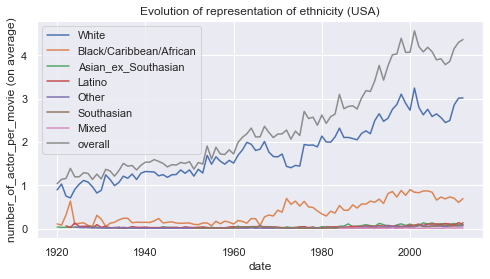

In [146]:
#number of movie per year
usa_year = df_usa.groupby(df_usa['date']).apply(lambda x : pd.Series({
            'num_of_movie' : x['movie_name'].nunique(),
            'num_of_actor_per_year': x['freebase_actor_character_id'].nunique()
        }))
usa_year['rate_overall'] = usa_year.apply(lambda x: x['num_of_actor_per_year'] / x['num_of_movie'], axis =1)

#plot of group of ethnicity representation from 1920 to 2012 in the US
list_df = {}

rates = np.zeros((len(usa_year),len(population_per_group)))
i = 0
for grr in population_per_group.index:
    datagrr = df_usa[df_usa['groups'] == grr]
    date_charac_usa = datagrr.groupby(datagrr['date']).apply(lambda x: pd.Series({
            'num_of_actor' : len(x)
        }))
    date_charac_usa_copy = date_charac_usa
    date_charac_usa = pd.merge(date_charac_usa, usa_year, left_index=True, right_index=True, how = 'left')
    
    date_charac_usa_right = pd.merge(date_charac_usa_copy, usa_year, left_index=True, right_index=True, how = 'right')
    rate = np.array(date_charac_usa_right['num_of_actor']) / np.array(date_charac_usa_right['num_of_movie'])
    rates[:,i] = rate
    date_charac_usa['rate'] = date_charac_usa.apply(lambda x: x['num_of_actor'] / x['num_of_movie'], axis =1)
    list_df[grr] = date_charac_usa
    
    plt.plot(date_charac_usa.index, date_charac_usa.rate, label = grr)
    i += 1

plt.plot(usa_year.index, usa_year.rate_overall , label = 'overall')
plt.title('Evolution of representation of ethnicity (USA)')
plt.legend()
plt.ylabel('number_of_actor_per_movie (on average)')
plt.xlabel('date')
plt.show()

Black and white populations appear to be increasingly represented in the film industry. However, the overall number of actors per film is increasing.

> **NOTE :**
To determine the true trend in ethnic representation in the movie industry, we will normalize the number of actors by ethnic group by the total number of actors.

In [147]:
labels = np.arange(1920,2011,5).tolist()

df_white = list_df['White']
df_white['pourcentage'] = df_white.apply(lambda x: x['rate'] / x['rate_overall'], axis =1)

df_black = list_df['Black/Caribbean/African']
df_black['pourcentage'] = df_black.apply(lambda x: x['rate'] / x['rate_overall'], axis =1)

df_latino = list_df['Latino']
df_latino['pourcentage'] = df_latino.apply(lambda x: x['rate'] / x['rate_overall'], axis =1)

df_asian = list_df['Asian_ex_Southasian']
df_asian['pourcentage'] = df_asian.apply(lambda x: x['rate'] / x['rate_overall'], axis =1)

df_south = list_df['Southasian']
df_south['pourcentage'] = df_south.apply(lambda x: x['rate'] / x['rate_overall'], axis =1)

df_test = pd.DataFrame(index=labels)
df_test['white'] = df_white['pourcentage']
df_test['black'] = df_black['pourcentage']
df_test['latino'] = df_latino['pourcentage']
df_test['asian'] = df_asian['pourcentage']
df_test['south'] = df_south['pourcentage']

In [148]:
df_test = df_test.fillna(0)
np_test = np.array(df_test)
df_test

,white,black,latino,asian,south
1920,0.862069,0.103448,0.000000,0.034483,0.000000
1925,0.857143,0.102041,0.040816,0.000000,0.000000
1930,0.772152,0.189873,0.025316,0.000000,0.000000
1935,0.803797,0.158228,0.006329,0.000000,0.000000
1940,0.860360,0.094595,0.022523,0.004505,0.000000
1945,0.831081,0.101351,0.013514,0.020270,0.000000
1950,0.876652,0.083700,0.017621,0.000000,0.000000
1955,0.925581,0.041860,0.004651,0.018605,0.000000
1960,0.878378,0.060811,0.027027,0.013514,0.000000
1965,0.852679,0.107143,0.013393,0.004464,0.000000


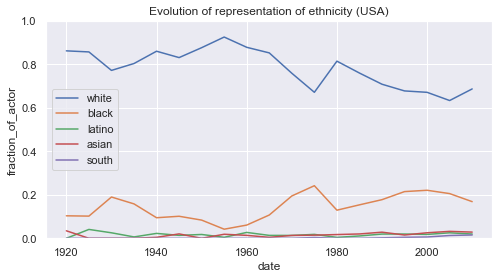

In [149]:
i=0
for grr in df_test.columns:
    plt.plot(df_test.index, df_test[grr], label = grr)
    
plt.title('Evolution of representation of ethnicity (USA)')
plt.legend()
plt.ylim([0, 1])
plt.ylabel('fraction_of_actor')
plt.xlabel('date')
plt.show()

---
**Conclusion**

The results are quite surprising: while white actors are less represented over time, while black actors are more represented, but not significantly so. Others ethnic groups doens't appear to be more represented over time. Why does it not add up to 1? People of mixed race are not taken into account. Conclusion: Things are improving, with more black and mixed ethnicities are being more represented. Asian not so much, despite the large Chinese diaspora.

---

## C. India <a name="subparagraph8"></a>

For Indian movies, we have at least 5400 movies, 22,000 characters, and 1200 different actors, which is a good number.

In [269]:
# As stated before Indian movies are well represented after 1970
india_top = df_india_1970
population_per_ethnicity = df_india_1970['Ethnicity'].value_counts()
ethnicity_array = df_india_1970['Ethnicity'].unique()

#Calculate the proportion of each ethnicity in the dataframe
ethn_india = pd.DataFrame(population_per_ethnicity/len(india_top))
ethn_india

,Ethnicity
Indians,0.580921
Tamil,0.043248
Punjabis,0.040191
Malayali,0.039741
Marathi people,0.033807
...,...
Native Hawaiians,0.000045
European Americans,0.000045
Italian Australian,0.000045
White South Africans,0.000045


First of all, let's look at the presence of `pakistanis` in the movie industry.

In [151]:
ethn_india[ethn_india.index.isin(['Pakistani','Muslim','Pakistani American'])]

,Ethnicity
Muslim,0.001169
Pakistani American,0.000315


Not really represented. Not surprising given the two countries' relationship.
If we consider punjabis as pakistanis :

In [152]:
ethn_india[ethn_india.index.isin(['Pakistani','Muslim','Pakistani American','Punjabis'])]

,Ethnicity
Punjabis,0.040191
Muslim,0.001169
Pakistani American,0.000315


> **NOTE :**
In terms of the India analysis, we will also look at how many actors played in movies on average over time, as well as their ethnic group.

In [281]:
#ethnicity groups
population_per_group = df_india_1970['groups'].value_counts()

#calculate the proportion of each ethnic group in actors 
population_per_group = pd.DataFrame(population_per_group/len(df_india_1970))
population_per_group

,groups
Southasian,0.950638
White,0.015555
Black/Caribbean/African,0.001034
Asian_ex_Southasian,0.000495
Other,0.000090
Latino,0.000090


The ethnic diversity is clearly different from that of American films, as nearly all of the actors are South Asians. 

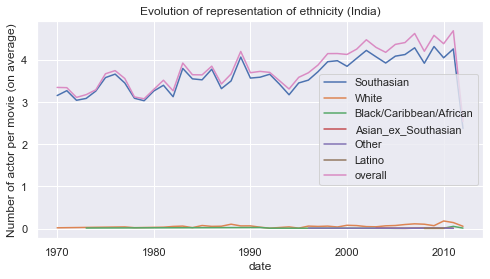

In [271]:
#number of movie per year
india_year = df_india_1970.groupby(df_india_1970['date']).apply(lambda x : pd.Series({
            'num_of_movie' : x['movie_name'].nunique(),
            'num_of_actor_per_year': x['freebase_actor_character_id'].nunique()
        }))
india_year['rate_overall'] = india_year.apply(lambda x: x['num_of_actor_per_year'] / x['num_of_movie'], axis =1)

#plot of group of ethnicity representation from 1970 to 2012 in India
list_df = {}
for grr in population_per_group.index:
    datagrr = df_india_1970[df_india_1970['groups'] == grr]
    date_charac_india = datagrr.groupby(datagrr['date']).apply(lambda x: pd.Series({
            'num_of_actor' : len(x)
        }))
    
    date_charac_india = pd.merge(date_charac_india, india_year, left_index=True, right_index=True, how = 'left')
    date_charac_india['rate'] = date_charac_india.apply(lambda x: x['num_of_actor'] / x['num_of_movie'], axis =1)
    list_df[grr] = date_charac_india

    plt.plot(date_charac_india.index, date_charac_india.rate, label = grr)

plt.plot(india_year.index, india_year.rate_overall , label = 'overall')
plt.title('Evolution of representation of ethnicity (India)')
plt.legend()
plt.ylabel('Number of actor per movie (on average)')
plt.xlabel('date')
plt.show()

In the case of India, it is clear that only the Southasian population is of interest to us, as there is no representation for the other ethnic groups.

In [272]:
# list of all the ethnicties present in the Indian movies 
df_india_south = df_india_1970[df_india_1970['groups']== 'Southasian']
index_south = df_india_south['Ethnicity'].unique()
index_south

array(['Indians', 'Bihari people', 'Bengali Hindus', 'Gujarati people',
       'Sikh', 'Punjabis', 'Kayastha', 'Kanyakubja Brahmins',
       'Afghans in India', 'Iranian people', 'Parsi', 'Nepali Indian',
       'Sindhis', 'Kashmiri Pandit', 'Sri Lankan Tamils', 'Tamil',
       'Karnataka Brahmins', 'Marathi people', 'Pakistanis',
       'Tamil Brahmin', 'Bengali people', 'Jats', 'Brahmin', 'Pashtuns',
       'Malayali', 'Telugu people', 'Bhutia', 'Indian Americans', 'Nair',
       'Ezhava', 'Kannada people', 'Niyogi', 'Bunt'], dtype=object)

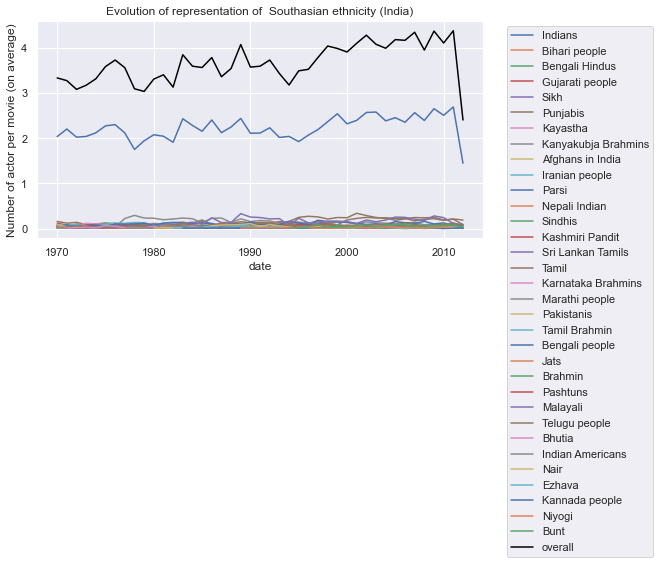

In [277]:
india_year_south = df_india_south.groupby(df_india_south['date']).apply(lambda x : pd.Series({
            'num_of_movie' : x['movie_name'].nunique(),
            'num_of_actor_per_year': x['freebase_actor_character_id'].nunique()
        }))
india_year_south['rate_overall'] = india_year_south.apply(lambda x: x['num_of_actor_per_year'] / x['num_of_movie'], axis =1)
for grr in index_south:
    datagrr = df_india_south[df_india_south['Ethnicity'] == grr]
    date_charac_india_south = datagrr.groupby(datagrr['date']).apply(lambda x: pd.Series({
            'num_of_actor' : len(x)
        }))
    
    date_charac_india_south = pd.merge(date_charac_india_south, india_year, left_index=True, right_index=True, how = 'left')
    date_charac_india_south['rate'] = date_charac_india_south.apply(lambda x: x['num_of_actor'] / x['num_of_movie'], axis =1)

    plt.plot(date_charac_india_south.index, date_charac_india_south.rate, label = grr)

plt.plot(india_year_south.index, india_year_south.rate_overall , color = 'black' ,label = 'overall')
plt.title('Evolution of representation of  Southasian ethnicity (India)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.ylabel('Number of actor per movie (on average)')
plt.xlabel('date')
plt.show()

---
**Conclusion**

Nothing to say apart that the few ethnicities are represented, mainly indian people are.

---

## D. Europe <a name="subparagraph9"></a>

In [282]:
#List of the European countries (geographic area) without the UK (as it's the third country with more movies in the dataset)
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
   'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

#dataset with only UK movies
df_uk = df_country_1970[df_country_1970['movie_countries'] == 'United Kingdom']

#dataset with european movies without UK
df_europe_without_uk = df_country_1970[df_country_1970['movie_countries'].isin(europe)]

#dataset with all european movies 
df_europe = pd.concat([df_uk,df_europe_without_uk], axis = 0)

num_movie_usa = len(df_europe['movie_name'])
print("We have a sample of " + str(num_movie_usa) + " movies produced in Europe from 1970 to 2012.")

We have a sample of 25238 movies produced in Europe from 1970 to 2012.


In [284]:
pd.DataFrame(df_europe['groups'].value_counts())

,groups
White,21298
Black/Caribbean/African,1186
Southasian,395
Asian_ex_Southasian,286
Latino,242
Other,104
Mixed,32


> **NOTE :**
As for the other areas, we will also look at how many actors played in movies on average over time, as well as their ethnic group.

In [285]:
#ethnicity groups
population_per_group = df_europe['groups'].value_counts()

#normalize with the number of actors 
population_per_group = pd.DataFrame(population_per_group/len(df_europe))
population_per_group

,groups
White,0.843886
Black/Caribbean/African,0.046993
Southasian,0.015651
Asian_ex_Southasian,0.011332
Latino,0.009589
Other,0.004121
Mixed,0.001268


In [288]:
#Looking at the top ethnicities we already defined we want to see their proportion for European countries 
europe_top = df_europe[df_europe['Ethnicity'].isin(top_ethnicity)]
population_per_ethnicity = df_europe['Ethnicity'].value_counts()
ethnicity_array = df_europe['Ethnicity'].unique()

#Calculate the proportion of each ethnicity
ethn_europe = pd.DataFrame(population_per_ethnicity/len(europe_top))
ethn_europe.head(20)

,Ethnicity
English people,0.203929
Jewish people,0.063509
French,0.058618
British people,0.045335
African Americans,0.040563
Irish people,0.035433
Scottish people,0.033723
Italians,0.032928
Swedes,0.029309
Germans,0.023065


> **NOTE :**
As we already did for India and the US, we will also look at how many actors played in movies on average over time, as well as their ethnic group.

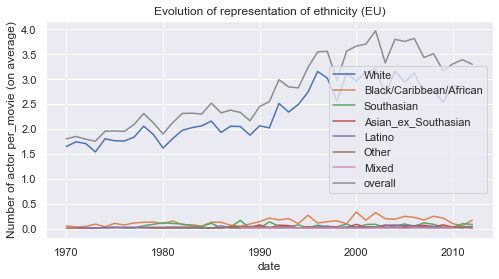

In [289]:
#number of movie per year
europe_year = df_europe.groupby(df_europe['date']).apply(lambda x : pd.Series({
            'num_of_movie' : x['movie_name'].nunique(),
            'num_of_actor_per_year': x['freebase_actor_character_id'].nunique()
        }))
europe_year['rate_overall'] = europe_year.apply(lambda x: x['num_of_actor_per_year'] / x['num_of_movie'], axis =1)

#plot of group of ethnicity representation from 1970 to 2012 in EU
list_df = {}
for grr in population_per_group.index:
    datagrr = df_europe[df_europe['groups'] == grr]
    date_charac_europe = datagrr.groupby(datagrr['date']).apply(lambda x: pd.Series({
            'num_of_actor' : x['freebase_actor_character_id'].nunique()
        }))
    
    date_charac_europe = pd.merge(date_charac_europe, europe_year, left_index=True, right_index=True, how = 'left')
    date_charac_europe['rate'] = date_charac_europe.apply(lambda x: x['num_of_actor'] / x['num_of_movie'], axis =1)
    list_df[grr] = date_charac_europe

    plt.plot(date_charac_europe.index, date_charac_europe.rate, label = grr)

plt.plot(europe_year.index, europe_year.rate_overall , label = 'overall')
plt.title('Evolution of representation of ethnicity (EU)')
plt.legend()
plt.ylabel('Number of actor per_movie (on average)')
plt.xlabel('date')
plt.show()


---
**Conclusion**

Taking Europe as a whole, we see a strong representation of white people and little representation of other ethnic groups. Perhaps it is better to look at each country individually and at ethnicity rather than groups.

---

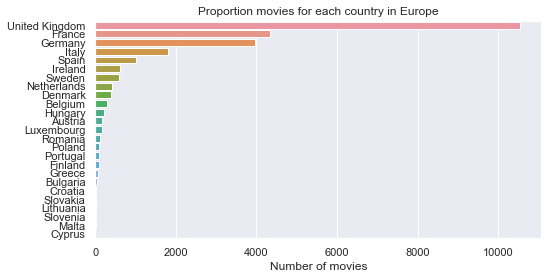

In [300]:
# calculate the number of movies 
europe_count=df_europe['movie_countries'].value_counts()

# plot of movie occurences by countries in Europe
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.barplot(x = europe_count, y = europe_count.index).set(title='Proportion movies for each country in Europe', xlabel='Number of movies')

> **NOTE :**
We will look more closely to the 3 countries with more movies : `UK`,`France`,`Germany`.

#### a. UK <a name="subsubparagraph1"></a>

In [301]:
uk_top10 = df_uk['Ethnicity'].value_counts().head(10)
pd.DataFrame(uk_top10)

,Ethnicity
English people,3228
British people,769
Jewish people,667
Scottish people,551
Irish people,441
African Americans,361
White British,255
Welsh people,254
white people,241
Irish migration to Great Britain,201


The actor distribution is quite diverse in term of UK ethnicities, only African American are coming for the different geographic area. 

In [164]:
#ethnicity groups

population_per_group = df_uk['groups'].value_counts()
population_per_group = pd.DataFrame(population_per_group/len(df_uk))
population_per_group

,groups
White,0.864973
Black/Caribbean/African,0.038308
Southasian,0.022094
Asian_ex_Southasian,0.008534
Latino,0.005500
Other,0.004551
Mixed,0.001328


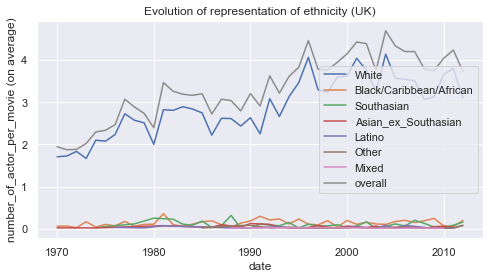

In [165]:
#number of movie per year
uk_year = df_uk.groupby(df_uk['date']).apply(lambda x : pd.Series({
            'num_of_movie' : x['movie_name'].nunique(),
            'num_of_actor_per_year': x['freebase_actor_character_id'].nunique()
        }))
uk_year['rate_overall'] = uk_year.apply(lambda x: x['num_of_actor_per_year'] / x['num_of_movie'], axis =1)

#plot of group of ethnicity representation from 1970 to 2012 in the UK
list_df = {}
for grr in population_per_group.index:
    datagrr = df_uk[df_uk['groups'] == grr]
    date_charac_uk = datagrr.groupby(datagrr['date']).apply(lambda x: pd.Series({
            'num_of_actor' : len(x)
        }))
    
    date_charac_uk = pd.merge(date_charac_uk, uk_year, left_index=True, right_index=True, how = 'left')
    date_charac_uk['rate'] = date_charac_uk.apply(lambda x: x['num_of_actor'] / x['num_of_movie'], axis =1)
    list_df[grr] = date_charac_uk

    plt.plot(date_charac_uk.index, date_charac_uk.rate, label = grr)

plt.plot(uk_year.index, uk_year.rate_overall , label = 'overall')
plt.title('Evolution of representation of ethnicity (UK)')
plt.legend()
plt.ylabel('number_of_actor_per_movie (on average)')
plt.xlabel('date')
plt.show()

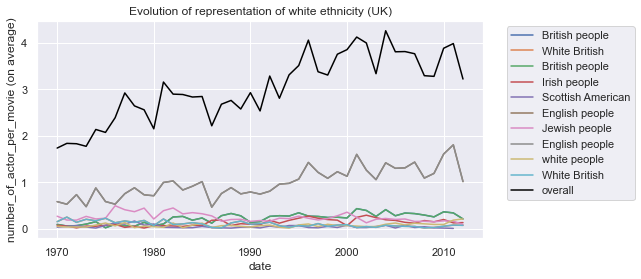

In [166]:
df_uk_white = df_uk[df_uk['groups']== 'White']
index_uk = df_uk_white['Ethnicity'].head(10)


uk_year_white = df_uk_white.groupby(df_uk_white['date']).apply(lambda x : pd.Series({
            'num_of_movie' : x['movie_name'].nunique(),
            'num_of_actor_per_year': x['freebase_actor_character_id'].nunique()
        }))
uk_year_white['rate_overall'] = uk_year_white.apply(lambda x: x['num_of_actor_per_year'] / x['num_of_movie'], axis =1)


for grr in index_uk:
    datagrr = df_uk[df_uk['Ethnicity'] == grr]
    date_charac_uk_white = datagrr.groupby(datagrr['date']).apply(lambda x: pd.Series({
            'num_of_actor' : len(x)
        }))
    
    date_charac_uk_white = pd.merge(date_charac_uk_white, uk_year, left_index=True, right_index=True, how = 'left')
    date_charac_uk_white['rate'] = date_charac_uk_white.apply(lambda x: x['num_of_actor'] / x['num_of_movie'], axis =1)

    plt.plot(date_charac_uk_white.index, date_charac_uk_white.rate, label = grr)

plt.plot(uk_year_white.index, uk_year_white.rate_overall , color = 'black' ,label = 'overall')
plt.title('Evolution of representation of white ethnicity (UK)')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.ylabel('number_of_actor_per_movie (on average)')
plt.xlabel('date')
plt.show()

Ugly graph. Try boxplot

In [167]:
uk_box = pd.DataFrame(df_uk['Ethnicity'].value_counts().head(10))


#### b. France <a name="subsubparagraph2"></a>

In [302]:
df_france = df_europe[df_europe['movie_countries'] == 'France']
pd.DataFrame(df_france['Ethnicity'].value_counts().head(10))

,Ethnicity
French,867
English people,511
Jewish people,284
Italians,200
African Americans,163
Italian Americans,110
British people,104
Germans,99
False,98
white people,95


---
**Conclusion**

There is a much better representation with a quite a good proportion of Americans actors and jewish people but the rest are mainly from neighbour countries. 

---

#### c. Germany <a name="subsubparagraph3"></a>

In [303]:
df_germany = df_europe[df_europe['movie_countries'] == 'Germany']
pd.DataFrame(df_germany['Ethnicity'].value_counts().head(10))

,Ethnicity
English people,533
African Americans,350
Jewish people,323
Germans,236
Irish Americans,159
Italian Americans,118
Canadians,108
white people,107
British people,104
French,104


---
**Conclusion**

Surprisingly, a large number of African Americans. There isn't much German. Many ethnicities are represented, including neighboring countries as well as American countries.

---

### E. Top 100 movies  <a name="subparagraph10"></a>

We chose to look at the 100 most famous movies based on the dataset's column **`revenue`**  to examine them in greater depth. Then we will examine the countries that produced the films, as well as the ethnic representation in terms of ethnic group and overall.

In [306]:
# Analyze movie revenue and number of films for all countries
data_countries = pd.DataFrame()

data_countries = merged_data.groupby(dft['movie_countries']).apply(lambda x: pd.Series({
         'revenue' : np.nansum(x['revenue']),
         'number_movie': len(x['freebase_movie_id'])
    }))

# sort data with the most movie at the top
data_c =data_countries.sort_values(by='revenue',ascending=False)
data_c.head(10)

,revenue,number_movie
movie_countries,,
United States of America,1.292356e+12,47417.0
India,4.561447e+11,18827.0
United Kingdom,2.643408e+11,9948.0
Germany,1.195120e+11,3280.0
France,1.136897e+11,3819.0
Canada,8.989223e+10,2741.0
Italy,4.308358e+10,2360.0
Spain,3.545345e+10,911.0
Japan,3.394742e+10,1162.0


Clearly, the United States has the most movies and the highest revenue, followed by India and the United Kingdom. We will now look at the top movies.

In [307]:
# remove movies that have not data for the revenue
movie_100 = df_country_1970[df_country_1970['revenue'].notna()]

movie_100 = movie_100.sort_values(by= 'revenue', ascending=False)

# get name of top 100 movies by box office revenu
top_100_movie = movie_100.movie_name.unique()[0:100,]   

#filter the data for the famous movies 
movie_100 = df_country_1970[df_country_1970['movie_name'].isin(top_100_movie)]
movie_100

,index,wikipedia_id,freebase_movie_id,date,character_name,gender,ethnicity,name,age,freebase_actor_character_id,freebase_actor_id,freebase_character_id,movie_name,revenue,movie_languages,movie_countries,movie_genres,Ethnicity,groups
20129,18107,518615,/m/02ktj7,1976.0,Dwan,F,/m/07hwkr,Jessica Lange,27.0,/m/0j_h7s,/m/0hsn_,/m/05lxyht,King Kong,90614445.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/0g092b"": ""Monster movie"", ""/m/0jdm8"": ""Re...",white Americans,White
20130,18108,518615,/m/02ktj7,1976.0,King Kong,M,/m/0g8_vp,Peter Cullen,35.0,/m/0h34xh0,/m/03dn9v,/m/04lr_4,King Kong,90614445.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/0g092b"": ""Monster movie"", ""/m/0jdm8"": ""Re...",Canadian Americans,White
20314,18263,518615,/m/02ktj7,1976.0,nan,M,/m/041rx,Charles Grodin,41.0,/m/0j_h7m,/m/01gy5k,nan,King Kong,90614445.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/0g092b"": ""Monster movie"", ""/m/0jdm8"": ""Re...",Jewish people,White
21184,19025,52549,/m/0dtfn,1977.0,Darth Vader,M,/m/0x67,James Earl Jones,46.0,/m/02nv74t,/m/0f6_x,/m/0f2y0,Star Wars Episode IV: A New Hope,775398007.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...",African Americans,Black/Caribbean/African
21207,19046,52549,/m/0dtfn,1977.0,Leia Organa,F,/m/041rx,Carrie Fisher,20.0,/m/0k3r24,/m/01tnbn,/m/0ddqw,Star Wars Episode IV: A New Hope,775398007.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...",Jewish people,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127401,101763,31186339,/m/0gkz15s,2012.0,Gale Hawthorne,M,/m/0bbz66j,Liam Hemsworth,22.0,/m/0gw7kv7,/m/04yd0fh,/m/0ds96_p,The Hunger Games,686533290.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",Australians,White
127402,101764,31186339,/m/0gkz15s,2012.0,Caesar Flickerman,M,/m/0xnvg,Stanley Tucci,51.0,/m/0gw7kw1,/m/02bj6k,/m/0gwc3bn,The Hunger Games,686533290.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",Italian Americans,White
127403,101765,31186339,/m/0gkz15s,2012.0,President Snow,M,/m/07bch9,Donald Sutherland,76.0,/m/0gwc391,/m/0ywqc,/m/0dsbx11,The Hunger Games,686533290.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",Scottish American,White
127404,101766,31186339,/m/0gkz15s,2012.0,Cinna,M,/m/041rx,Lenny Kravitz,47.0,/m/0gw7kvx,/m/0161sp,/m/0gwc39n,The Hunger Games,686533290.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",Jewish people,White


In [308]:
only_movie = movie_100.drop_duplicates(subset='movie_name', keep='first')
pd.DataFrame(only_movie['movie_countries'].value_counts())

,movie_countries
United States of America,98
Singapore,1


In [313]:
pd.DataFrame(movie_100['Ethnicity'].value_counts())

,Ethnicity
English people,373
Jewish people,137
African Americans,125
British people,100
Scottish people,54
...,...
Taiwanese Americans,1
Lebanese American,1
Filipino Australians,1
Hispanic,1


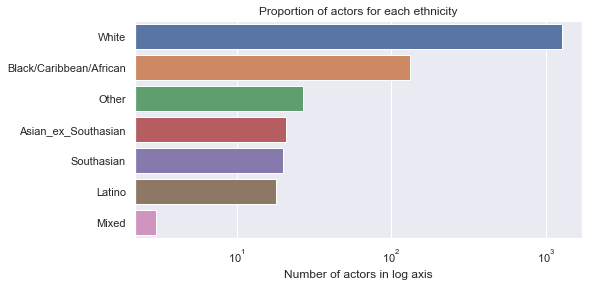

In [317]:
# calculate the number of actors by group
famous_count=movie_100['groups'].value_counts()

# plot of actor occurences by group
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.barplot(x = famous_count, y = famous_count.index).set(title='Proportion of actors for each ethnicity', xlabel='Number of actors in log axis', xscale='log')

---
**Conclusion**

Because the top countries are mostly made up of Americans, the ethnic representation is quite skewed. As before, there is a large representation of white. There are many ethnicities, but they are not well represented. Black people appear to be more represented than other ethnic groups, with the exception of white people.

---

### F. Interactive plot <a name="subparagraph11"></a>

In [174]:
import plotly.express as px

df_interactive = merged.groupby(['movie_countries','date','groups']).apply(lambda x: pd.Series({
        'population': len(x),
    }))

coun = ['United States of America','India','France','Germany','United Kingdom']
df_interactive = df_interactive.reset_index()
df_interactive = df_interactive[df_interactive['movie_countries'].isin(coun)]
df_interactive = df_interactive.sort_values(by ='date')

# Add column on lattitude and longitude
# Create a dictionary containing the latitude and longitude of each country
locations = {
    "France": (46.603354, 1.8883335),
    "Germany": (51.16569, 10.451526),
    "United Kingdom": (55.378051, -3.435973),
    "India": (20.593684, 78.96288),
    "United States of America": (37.09024, -95.712891)
}

# Add the latitude and longitude columns to the dataframe
for country, coords in locations.items():
    df_interactive.loc[df_interactive["movie_countries"] == country, "Latitude"] = coords[0]
    df_interactive.loc[df_interactive["movie_countries"] == country, "Longitude"] = coords[1]
df_interactive

,movie_countries,date,groups,population,Latitude,Longitude
823,France,1920.0,White,1,46.603354,1.888334
3472,United States of America,1920.0,White,25,37.090240,-95.712891
3471,United States of America,1920.0,Black/Caribbean/African,3,37.090240,-95.712891
3470,United States of America,1920.0,Asian_ex_Southasian,1,37.090240,-95.712891
3184,United Kingdom,1920.0,White,4,55.378051,-3.435973
...,...,...,...,...,...,...
1031,France,2012.0,White,78,46.603354,1.888334
1030,France,2012.0,Southasian,1,46.603354,1.888334
1029,France,2012.0,Other,2,46.603354,1.888334
1027,France,2012.0,Black/Caribbean/African,6,46.603354,1.888334


For the plotly to work correctly and to display every groups of ethnicity, we to have a dataframe for which every ethnicity for each year has a population. We use a country name 'dummy' with latitude and longitude 0.

In [175]:
# Create a list of dates from 1920 to 2012, with 5 entries for each year. Have to do it so that plotly display all groups.
dates = []
for year in range(1920, 2013):
    for i in range(5):
        dates.append(int(year))

# Create a list of dummy movie countries
movie_countries = ['dummy'] * len(dates)

# Create a list of population values (all 1)
population = [1] * len(dates)

# Create a list of latitude and longitude values (all 0)
latitude = [0] * len(dates)
longitude = [0] * len(dates)

# Create a list of groups, with one entry for each date
groups = ['White', 'Black/Caribbean/African', 'Asian_ex_Southasian', 'Latino', 'Southasian'] * len(range(1920, 2013))

# Create the DataFrame
df_dummy = pd.DataFrame({'movie_countries': movie_countries,
                   'date': dates,
                   'groups': groups,
                   'population': population,
                   'Latitude': latitude,
                   'Longitude': longitude})

# Create the DataFrame used for the map
df_interactive_map = pd.concat([df_interactive,df_dummy])
df_interactive_map = df_interactive_map.sort_values(by= 'date')


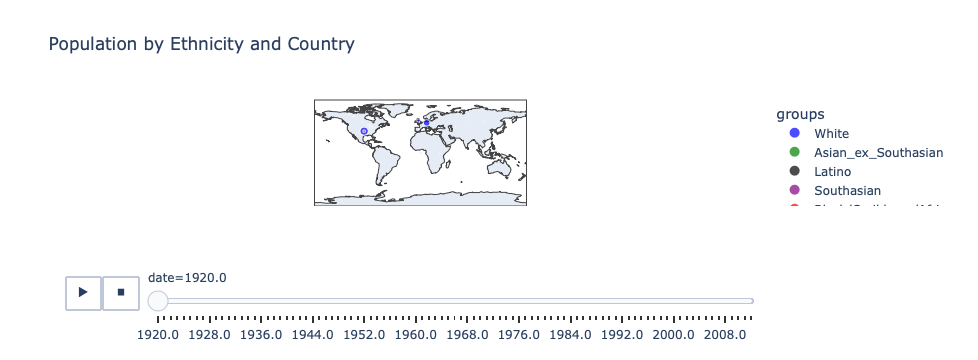

In [176]:
# Create an interactive bubble chart
fig = px.scatter_geo(
    data_frame=df_interactive_map,  
    lat="Latitude",  
    lon="Longitude",  
    size="population",  
    size_max = 50,
    color='groups',  # Contains the ethnicity
    color_discrete_map={'White': 'blue', 'Black/Caribbean/African': 'red','Asian_ex_Southasian': 'green','Latino': 'black','Southasian': 'purple' },
    hover_name="movie_countries",  # Contains the country name
    title="Population by Ethnicity and Country",  
    animation_frame="date", # Contains the date
    #template='plotly_dark' # Set the theme 
   
)

fig.show()

# 5-Diversity score <a name="paragraph5"></a>

## A-Entropy score <a name="subparagraph12"></a>

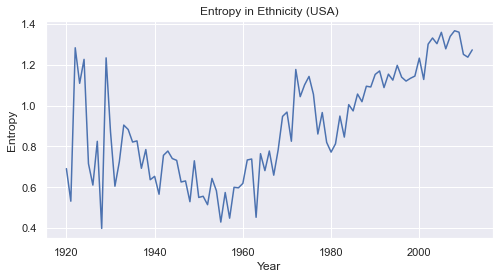

In [177]:
# Plot entropy
rates[np.isnan(rates)] = 0
row_sum = np.sum(rates,1)

np.seterr(divide = 'ignore')
H = np.zeros((len(usa_year)))
for i in range(len(population_per_group)):
    factor = rates[:,i]/row_sum
    log_ = np.log2(factor)
    log_[np.isinf(log_)] = 0
    H = H - factor*log_
np.seterr(divide = 'warn')

plt.plot(usa_year.index,H)
plt.title('Entropy in Ethnicity (USA)')
plt.xlabel('Year')
plt.ylabel('Entropy')
plt.show()

Check why entropy is bigger than one and find reason why it is declining in the beginning of the 20th century.

## B-Simpson index <a name="subparagraph2"></a>

In [178]:
def simpson_index (data) : 
    from collections import Counter

    # Calculate the relative abundance of each data point
    counts = Counter(data)
    abundances = {k: v/len(data) for k, v in counts.items()}
    # Calculate the Simpson diversity index
    simpson_index = 1 - sum(v**2 for v in abundances.values())
    
    return simpson_index 

We will first group all the movies by their wikipedia ID to calculate the diversity score of their actors, then we will make an analysis to see if their is more diversity over time as nowadays diversity representation is big subject we expect to see more diversity now moroever in occidental movies : Europe, USA, Australia...
1. Calculate the diversity score 
    ```
    First we have to calculate for each movie the diversity score (simpson) using actors ethnicities in each movies. We will keep only movies with more than 4 acotrs. 
    
    ```
2. Use a stastitical test to see if there is a statistical difference between the different periods of time 
   ```
 We will then perform a statistical test on all the periods of the datafram, to group movies in periods and to have enough data we will choose data from 1940 to 2010 and put every movie in a period of 10 years. 
    ```
3. Create an heatmap with the p_values of for the different periods
   ```
   We will store all the p_values in a 2D matrix and create a symetrical heatmap to show if the p_value is low or high, we can then conclude if the diveristy if statisticaly different. 
    
    ```

### 1-T-test for the different period of time <a name="subsubparagraph1"></a>
 

First the have to change the date to obtain all movies in a 10 years periods in only one category, then we will calculate the diversity score for each movie removing movies with less than 4 actors. 

In [179]:
#replace the last number of the year by 0 to put every years for example 1967 in the period 1960-69
def period (data) : 
    #make a copy
    modified_date = data
    # Set the last number of the year to 0
    modified_date['date'] = modified_date['date'].apply(lambda x: x - (x % 10))
    return modified_date

In [180]:
# remove countries before 1940 or after 2010 
period_data = dft[dft.date > 1940]
period_data = period_data[period_data.date < 2011]

# use period function to obtain only period of 10 years
period_data = period (period_data)

In [181]:
#groupby the data by movie and date and calculate the diveristy score for each movie
diversity_movies = period_data.groupby(['wikipedia_id','date'],as_index=False).apply(lambda x: pd.Series({
        'number_of_actors': len(x['freebase_actor_id']),
        'simpson_index' : simpson_index(x['ethnicity'])
    }))

#remove all movies with less than 4 actors
diversity_movies = diversity_movies.loc[diversity_movies["number_of_actors"] >= 4]
diversity_movies

,wikipedia_id,date,number_of_actors,simpson_index
2,3746,1980.0,8.0,0.750000
3,3837,1970.0,9.0,0.790123
5,4227,1970.0,6.0,0.666667
6,4231,1990.0,8.0,0.750000
7,4560,1990.0,9.0,0.790123
...,...,...,...,...
31669,36352568,1980.0,6.0,0.666667
31674,36354703,1990.0,4.0,0.750000
31705,36567252,1970.0,6.0,0.444444
31711,36724042,2000.0,6.0,0.500000


There are a few statistical tests that you can use to analyze the ethnic diversity of a population over different periods of time. One approach would be to use a nonparametric test, such as the Kruskal-Wallis test, which is a generalization of the one-way ANOVA (analysis of variance) test that does not assume a normal distribution of the data. The Kruskal-Wallis test can be used to compare multiple groups of data with different numbers of observations, and it is often used to test for differences in the distribution of a continuous variable among two or more groups.

To perform the Kruskal-Wallis test, you would first need to organize your data into groups representing the different periods of time that you are interested in. You would then calculate the median value for each group and compare the medians using the Kruskal-Wallis test. If the test indicates that there is a significant difference in the median values for the groups, you can conclude that there is a significant difference in the ethnic diversity of the population across the different periods of time.

Yes, it is possible to perform the Kruskal-Wallis test on data with different lengths. The Kruskal-Wallis test is a nonparametric test, which means that it does not assume that the data follows a particular distribution (e.g., normal distribution). This makes it well-suited for data with different lengths, as the length of the data does not affect the validity of the test.

In [182]:
def krustal_test (data) : 
    # Initialize a matrix to store the p-values for each comparison
    p_values = []
    # Loop through the data and perform the Kruskal-Wallis test for each pair of periods
    for i in range(len(data)):
        row = []
        for j in range(len(data)):
            # Perform the Kruskal-Wallis test
            statistic, p_value = kruskal(data[i], data[j])
            # Store the p-value in the matrix
            row.append(p_value)
        p_values.append(row)
    return p_values

In [183]:
# list of all the periods 
list_periods = np.arange(1940, 2020, 10).tolist()
matrix_score = pd.DataFrame()

# Group the records by year and extract the diversity scores for each year
scores_by_year = {}
for index, record in diversity_movies.iterrows():
    year = record[1]
    score = record[3]
    if year in scores_by_year:
        scores_by_year[year].append(score)
    else:
        scores_by_year[year] = [score]

# Create a matrix with the diversity scores for each year as rows
matrix_score= [scores for year, scores in scores_by_year.items()]

In [184]:
print(krustal_test (matrix_score))

[[1.0, 8.666979755237234e-14, 1.999600704370579e-13, 9.358291273776698e-19, 4.33917170703347e-06, 2.3635330243252436e-06, 0.7814983713539729, 1.7950352613467153e-07], [8.666979755237234e-14, 1.0, 1.7078197365901974e-41, 4.337201469707799e-49, 0.1881975955302921, 0.511159505123097, 0.024037336516977797, 8.1385225968490535e-22], [1.999600704370579e-13, 1.7078197365901974e-41, 1.0, 0.15746946766520795, 3.91571841348873e-20, 3.71637503751431e-14, 0.17968716452654715, 0.2785186624295409], [9.358291273776698e-19, 4.337201469707799e-49, 0.15746946766520795, 1.0, 3.9005494874394424e-23, 2.2110438698119464e-15, 0.11503852203214393, 0.6893914693332428], [4.33917170703347e-06, 0.1881975955302921, 3.91571841348873e-20, 3.9005494874394424e-23, 1.0, 0.15447660877926925, 0.08123991172515956, 1.5884581825724323e-13], [2.3635330243252436e-06, 0.511159505123097, 3.71637503751431e-14, 2.2110438698119464e-15, 0.15447660877926925, 1.0, 0.01833823928956502, 1.065320443504518e-11], [0.7814983713539729, 0.024

### 2-Heatmap of p_value diversity for each period <a name="subsubparagraph2"></a> 

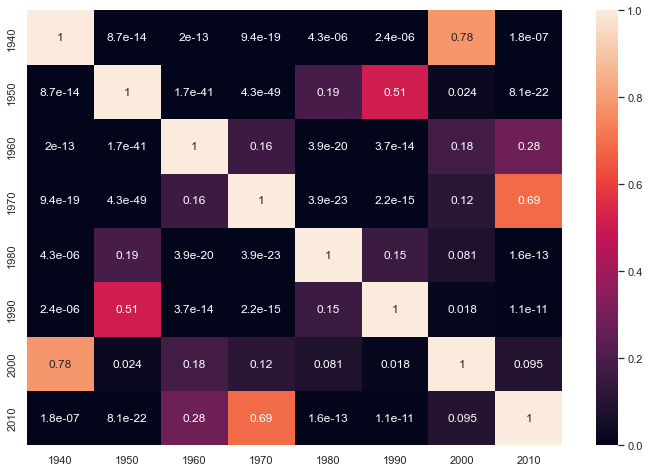

In [185]:
plt.figure(figsize=(12,8)) 

# Create an heatmap for all the p_values comparing each periods in the dataset
sns.heatmap(krustal_test(matrix_score),xticklabels=list_periods, yticklabels=list_periods, annot=True)
plt.tick_params(left=False, bottom=False)

plt.show()

Obviously it is a simetrical matrix as we are comparing the same values, also the p_value for the t_test comparing the same data in the diagonal is 1 as it shows no difference a all. It was expected. Other things are more surprising and can be explored using a confidence interval and mean of ethnic score for each period to see if diversity is increasing or decreasing over time. 

### 3-Looking at the data and showing significant differences <a name="subsubparagraph3"></a> 

In [186]:
from statistics import mean
from scipy.stats import sem, t
# Calculate the mean and 95% CI for the different periods
mean_CI = []
confidence = 0.95
for i, inner_list in enumerate(matrix_score) :
    row = []
    n = len(inner_list)
    m = mean(inner_list)
    std_err = sem(inner_list)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    start = m - h
    end = m + h
    row = m, start, end
    mean_CI.append({
        'Period': 1940+(i*10),
        'Mean': m,
        'Lower': start,
        'Upper': end, 
        'sd': std_err
    })
dfmean = pd.DataFrame(mean_CI)
dfmean

,Period,Mean,Lower,Upper,sd
0,1940,0.569086,0.557794,0.580378,0.005756
1,1950,0.494591,0.477987,0.511194,0.008459
2,1960,0.607232,0.599035,0.615429,0.004180
3,1970,0.612002,0.605820,0.618183,0.003153
4,1980,0.506237,0.483181,0.529294,0.011733
5,1990,0.459388,0.418835,0.499942,0.020558
6,2000,0.538239,0.457792,0.618687,0.040032
7,2010,0.611339,0.591255,0.631422,0.010221


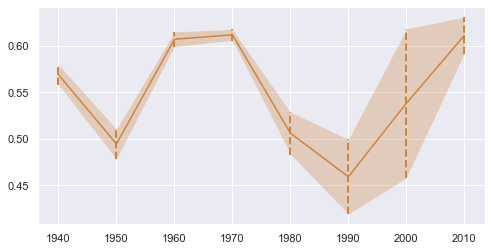

In [187]:
# Create a Pandas DataFrame from the data
dataf = pd.DataFrame(mean_CI)

# Plot the histogram using Matplotlib's errorbar() function

plt.plot(dataf['Period'], dataf['Mean'], color='peru')
plt.vlines(x=dataf['Period'], ymin=dataf['Lower'], ymax=dataf['Upper'], colors='peru', ls='--', lw=2, label='vline_multiple - full height')

plt.fill_between(dataf['Period'], dataf['Lower'], dataf['Upper'], facecolor='peru', alpha=0.3)


# Show the plot
plt.show()

The data show a quite interesting story, overall looking at the entire dataset we cannot say really that diveristy increases for actors in movies as there is not a real difference between 1960/1970 and now but we can say that since 1990 diveristy increase significaly (looking at the p_values that are pretty low and indicate a significant difference in diversity). To understand the data and its variability better we could show the diversity for different countries, we could try to do the same analysis but for USA, India and Europe. 

# 6-Correlation between success and actors diversity <a name="paragraph6"></a>

To analyse in more detail the ethnic representation in the movie industry, we can look at the more successful movie and the ethnic diversity in such. First we have to define a successfull movie we have in the dataset two datas that can be used : box-office and the number of movies. 

In [188]:
# Analyze movie revenue and number of films for all countries
data_countries = pd.DataFrame()

data_countries = merged_data.groupby(dft['movie_countries']).apply(lambda x: pd.Series({
         'revenue' : np.nansum(x['revenue']),
         'number_movie': len(x['freebase_movie_id'])
    }))

# sort data with the most movie at the top
data_c =data_countries.sort_values(by='number_movie',ascending=False)
data_c.head(10)

,revenue,number_movie
movie_countries,,
United States of America,1.292356e+12,47417.0
India,4.561447e+11,18827.0
United Kingdom,2.643408e+11,9948.0
France,1.136897e+11,3819.0
Germany,1.195120e+11,3280.0
Canada,8.989223e+10,2741.0
Italy,4.308358e+10,2360.0
Japan,3.394742e+10,1162.0
Australia,3.095528e+10,932.0


First we will look at the box-office datas and see if we have enought data. 

In [189]:
#use of the dataframe created in the first part of the project
df_success = dft.copy()
print("Number of data in the movie dataset {}".format(len(df_success)))
print("Number of data with the revenue {}".format(len(df_success[df_success['revenue']>=0])))

Number of data in the movie dataset 127462
Number of data with the revenue 44764


On the all dataset only 28% have a data for the revenue, it is not a lot as it's overall for all the countries on a long period of time. We can look at the distribution and see if it's relevant to work with this data. 

In [190]:
dft.loc[dft['revenue']>=0, 'movie_countries'].value_counts().head(10)

United States of America    29030
United Kingdom               4879
Germany                      2367
France                       1906
Canada                       1328
Australia                     620
Italy                         572
Japan                         500
Spain                         346
Ireland                       272
Name: movie_countries, dtype: int64

Looking at the datas, we most of our data are for the USA and is much less for others countries. As it makes more sens to look at the ethnic deiversity in a country we will not use data with less than 1000 data because we will look in these datas as multiple ethnicities that will again dampen the number of data we have. We can select 5 countries with more data and see looking at the ethnic representation if we have cluster on the revenue. 

We prefer to work with another data for the success, as we don't have enought data in the revenu. We will define now the success for a movie as the success of actors playing in this movie. First to implement this we will look at the actors in the dataset and calculate the number of movies for each to define a ranking of successfull actors. 

In [191]:
#first we will group our dataset by actors 
actor_success = dft.groupby(dft['freebase_actor_id']).apply(lambda x: pd.Series({
        'num_of_movies' : x['movie_name'].nunique(), 
    }))

In [192]:
actor_success.sort_values(by= 'num_of_movies', ascending=False)

,num_of_movies
freebase_actor_id,
/m/0c5vh,455
/m/04c636,293
/m/02fbpz,223
/m/02hkv5,210
/m/09tqx3,195
...,...
/m/05bn6v,1
/m/02ryl79,1
/m/05bsg1n,1


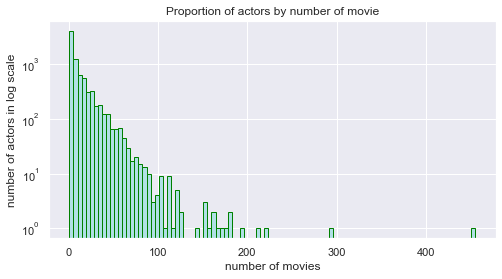

In [193]:
#plot an histogram to see the proportion of actors that have played in more or less movies
plt.hist(actor_success,bins=100, color = 'powderblue',
            edgecolor = 'green')
plt.xlabel('number of movies')
plt.yscale('log')
plt.ylabel('number of actors in log scale')
plt.title('Proportion of actors by number of movie')
plt.show()

We used a log scale as the distribution look more like a power low distribution. We can see that most actors have played less than 100 movies. We will use an arbitrary threshold and definition of success as the 10% actors with the most movies are the famous one. 

In [194]:
print("For a threshold of 35 movies played by each actors we have a percentage of {} actors in the dataset".format(len(actor_success.loc[actor_success["num_of_movies"] >= 45])/len(actor_success)*100))


For a threshold of 35 movies played by each actors we have a percentage of 5.371287128712871 actors in the dataset


Now that we have famous actors we want to find famous movies in the dataset, a new rule is that we consider a movie successfull if there is more than two famous actors playing in it. 

In [195]:
#First we have to retrieve these actors and the movies they played in 
top_actors_names = actor_success.loc[actor_success["num_of_movies"] >= 40]

#Retrieve all the movies that have one famous actor playing in it 
dft_success = dft[dft['freebase_actor_id'].isin(top_actors_names.index)]

#We want to drop movies with less than two actors 
dft_success = dft_success.groupby(dft_success['wikipedia_id']).apply(lambda x: pd.Series({
        'num_of_actors' : len(x)
    }))

dft_success = dft_success.loc[dft_success["num_of_actors"] >= 2]

#Now we will obtain a list with the famous movies names we want to consider 
dfamous_movies = dft[dft['wikipedia_id'].isin(dft_success.index)]

In [196]:
print("For a threshold of less than 1 movie played by each actors we have a percentage of {} actors in the dataset".format(len(actor_success.loc[actor_success["num_of_movies"] <= 27])/len(actor_success)*100))


For a threshold of less than 1 movie played by each actors we have a percentage of 87.06683168316832 actors in the dataset


In [197]:
#First we have to retrieve these actors and the movies they played in 
actors_names_10 = actor_success.loc[actor_success["num_of_movies"] >= 27]

#Retrieve all the movies name that have an actor with more than 1 movie playing in it
dft_success = dft[dft['freebase_actor_id'].isin(actors_names_10.index)]

#For later we also make the same list with all the non_famous movies 
dnon_famous_movies = dft[~dft['wikipedia_id'].isin(dft_success['wikipedia_id'])]

Now that we obtained the table with our famous movies we will look at some simple analysis like from which countries these movies are, or is there some diversity overall in the datas. A deeper analysis on the diversity with observational studies will be made later on. 

In [198]:
#firstly drop all duplicates of movies 
famous_movies=dfamous_movies.drop_duplicates(subset='wikipedia_id', keep='first')
non_famous_movies = dnon_famous_movies.drop_duplicates(subset='wikipedia_id', keep='first')

#secondly we will group our dataset by country and count the number of movie by countries
count_movies = famous_movies.groupby(famous_movies['movie_countries'],as_index=False).apply(lambda x: pd.Series({
        'num_of_movies' : len(x['wikipedia_id']),
    }))
#same but for the entire dataframe
count_movies_all = dft.groupby(dft['movie_countries'],as_index=False).apply(lambda x: pd.Series({
        'num_of_movies' : len(x['wikipedia_id']),
    }))
#same but for non famous movies 
count_movies_non = non_famous_movies.groupby(non_famous_movies['movie_countries'],as_index=False).apply(lambda x: pd.Series({
        'num_of_movies' : len(x['wikipedia_id']),
    }))

In [199]:
print(f"The number of movie in the famous dataset is {len(famous_movies['wikipedia_id'])} while the number of movies for the non famous data set is {len(non_famous_movies['wikipedia_id'])}.")


The number of movie in the famous dataset is 10529 while the number of movies for the non famous data set is 10548.


In [200]:
print(f"The number of movie in the famous dataset is {count_movies['num_of_movies'].sum()} while the number of movies for the non famous data set is {count_movies_non['num_of_movies'].sum()}.")


The number of movie in the famous dataset is 10125 while the number of movies for the non famous data set is 10038.


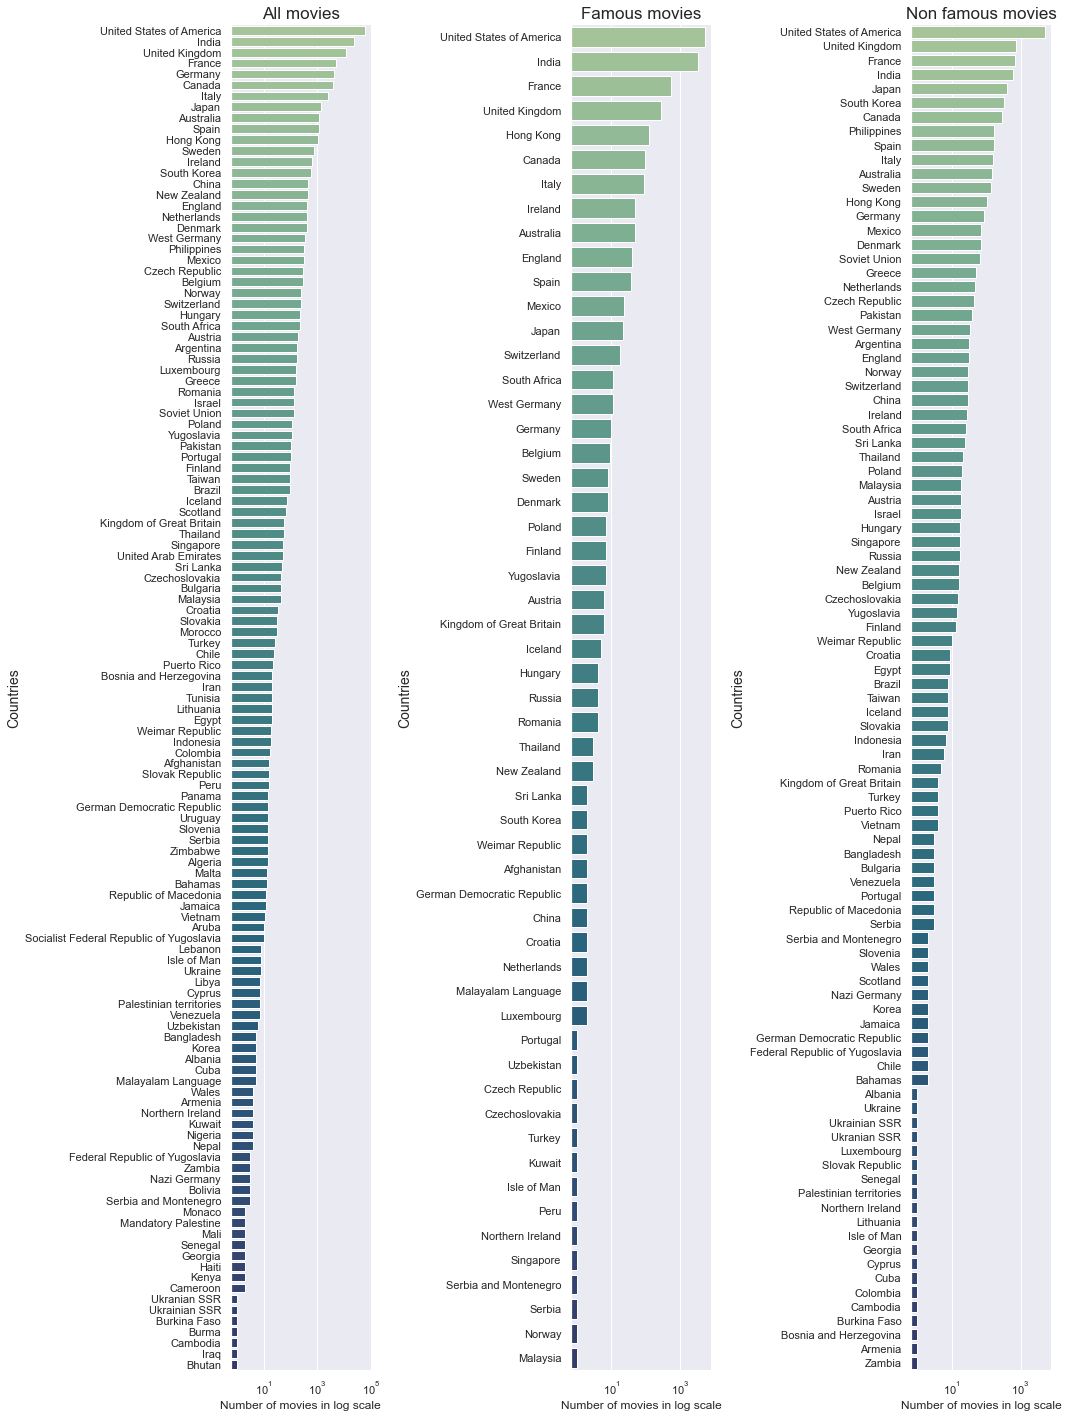

In [201]:
fig, ax = plt.subplots(1,3, figsize=(15, 20))

count_movies_all = count_movies_all.sort_values(by=['num_of_movies'],  ascending=False)
sns.barplot(data=count_movies_all,y='movie_countries',x='num_of_movies', ax = ax[0], palette = "crest")
ax[0].set_title("All movies", fontsize = 17)
ax[0].set_ylabel("Countries", fontsize = 14)
ax[0].set_xscale('log')
ax[0].set_xlabel("Number of movies in log scale", fontsize = 12)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

count_movies = count_movies.sort_values(by=['num_of_movies'],  ascending=False)
sns.barplot(data=count_movies,y='movie_countries',x='num_of_movies', ax = ax[1], palette = "crest")
ax[1].set_title("Famous movies", fontsize = 17)
ax[1].set_ylabel("Countries", fontsize = 14)
ax[1].set_xscale('log')
ax[1].set_xlabel("Number of movies in log scale", fontsize = 12)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

count_movies_non= count_movies_non.sort_values(by=['num_of_movies'],  ascending=False)
sns.barplot(data=count_movies_non,y='movie_countries',x='num_of_movies', ax = ax[2], palette = "crest")
ax[2].set_title("Non famous movies", fontsize = 17)
ax[2].set_ylabel("Countries", fontsize = 14)
ax[2].set_xscale('log')
ax[2].set_xlabel("Number of movies in log scale", fontsize = 12)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)


fig.tight_layout(pad=1.5)
plt.show()

In [202]:
def small_value (data) : 
    output= data.copy()
    data_lenth = output['num_of_movies'].sum()
    output.loc[(output['num_of_movies']/data_lenth)*100< 2, 'movie_countries'] = 'other'
    output = output.groupby('movie_countries')['num_of_movies'].sum().reset_index()
    return output

We can already tell just looking at the data that we have different data for famous and non famous movies, as checked before we have a similar number of movies for the two dataset but we have different number of countries producing: 90 different countries for the non_famous and 50 for the famous one. Again looking in more detail we can see difference in the movies producing famous or non famous countries. 

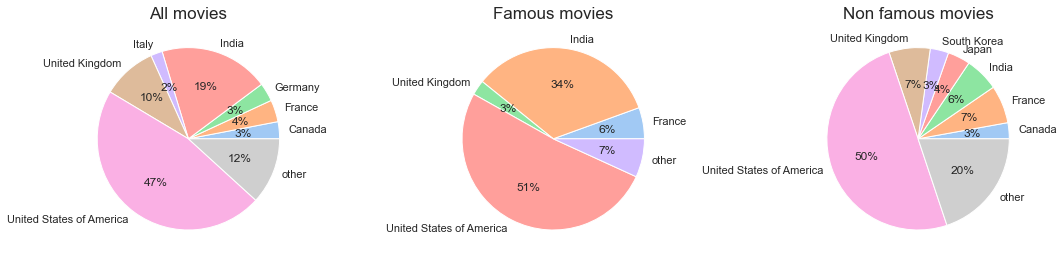

In [203]:
fig, ax = plt.subplots(1,3, figsize=(15,15))
colors = sns.color_palette('pastel')

ax[0].pie(small_value(count_movies_all)['num_of_movies'],labels= small_value(count_movies_all)['movie_countries'],colors = colors, autopct='%.0f%%')
ax[0].set_title("All movies", fontsize = 17)


ax[1].pie(small_value(count_movies)['num_of_movies'],labels= small_value(count_movies)['movie_countries'], colors = colors, autopct='%.0f%%')
ax[1].set_title("Famous movies", fontsize = 17)

ax[2].pie(small_value(count_movies_non)['num_of_movies'],labels= small_value(count_movies_non)['movie_countries'], colors = colors, autopct='%.0f%%')
ax[2].set_title("Non famous movies", fontsize = 17)

fig.tight_layout(pad=1.5)
plt.show()

As expected the famous movies are more present in US, India and Europe, we also have a good number of data for the Canada. As we have outliers like the United State of America and the distribution is more a distribution we used a log axis for the number of famous movies. Now we will look more into the ethnic diversity in these famous overall and in the main countries producing these movies. 

In [204]:
def mapping (data) : 
    fname = 'mapping.pickle'
    mapping = pickle.load(open(fname,'rb'))
    
    ethn_actors = data['ethnicity'].value_counts()
    ethn= pd.DataFrame()
    ethn['ID'] = ethn_actors.keys()
    ethn['# Actors'] = ethn_actors.values
    ethn['Ethnicity'] = ethn_actors.keys().map(mapping)
    return ethn

In [205]:
USA_famous = dfamous_movies.loc[dfamous_movies['movie_countries']=='United States of America']
mapping(USA_famous)

,ID,# Actors,Ethnicity
0,/m/041rx,3674,Jewish people
1,/m/0x67,3214,African Americans
2,/m/02w7gg,2286,English people
3,/m/033tf_,1711,Irish Americans
4,/m/0xnvg,1584,Italian Americans
...,...,...,...
322,/m/04jq32s,1,Nepali Indian
323,/m/08c25t,1,Wolof people
324,/m/0dllcfn,1,Afghans in India
325,/m/03h1dq9,1,Indian diaspora in France


In [206]:
USA_non_famous = dnon_famous_movies.loc[dnon_famous_movies['movie_countries']=='United States of America']
mapping(USA_non_famous)

,ID,# Actors,Ethnicity
0,/m/0x67,2137,African Americans
1,/m/041rx,1284,Jewish people
2,/m/02ctzb,626,white people
3,/m/033tf_,422,Irish Americans
4,/m/07hwkr,347,white Americans
...,...,...,...
283,/m/0fp4n,1,Tatars
284,/m/03ftx7,1,False
285,/m/03hf_6z,1,Gibraltarian people
286,/m/0c_lbq,1,Armenians in Russia


In [207]:
def small_ethn (data) : 
    output= data.copy()
    data_lenth = output['# Actors'].sum()
    output.loc[(output['# Actors']/data_lenth)*100< 1, 'Ethnicity'] = 'other'
    output = output.groupby('Ethnicity')['# Actors'].sum().reset_index()
    return output

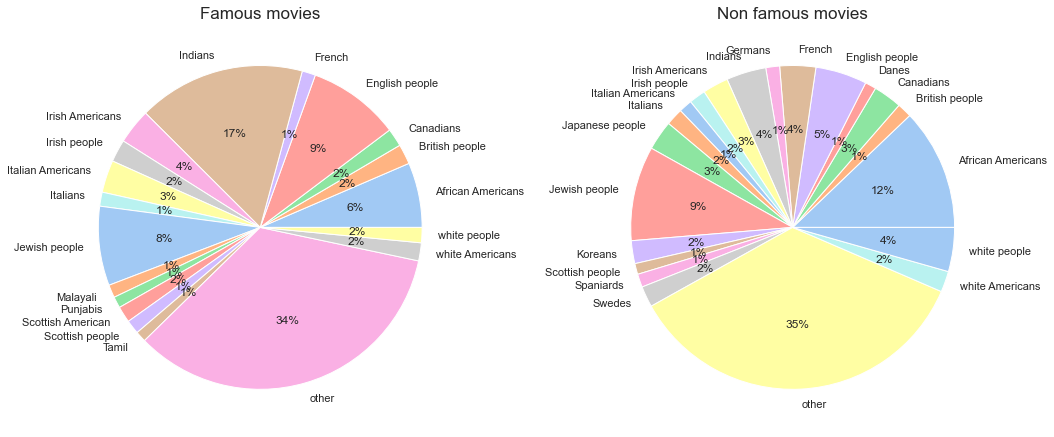

In [208]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
colors = sns.color_palette('pastel')

ax[0].pie(small_ethn(mapping(dfamous_movies))['# Actors'],labels= small_ethn(mapping(dfamous_movies))['Ethnicity'],colors = colors, autopct='%.0f%%')
ax[0].set_title("Famous movies", fontsize = 17)


ax[1].pie(small_ethn(mapping(dnon_famous_movies))['# Actors'],labels= small_ethn(mapping(dnon_famous_movies))['Ethnicity'], colors = colors, autopct='%.0f%%')
ax[1].set_title("Non famous movies", fontsize = 17)


fig.tight_layout(pad=1.5)
plt.show()

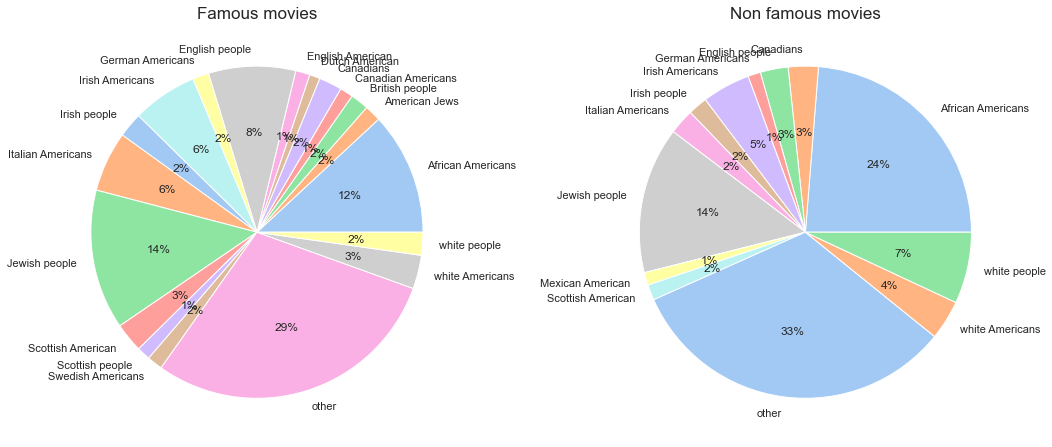

In [209]:
fig, ax = plt.subplots(1,2, figsize=(15,15))
colors = sns.color_palette('pastel')

ax[0].pie(small_ethn(mapping(USA_famous))['# Actors'],labels= small_ethn(mapping(USA_famous))['Ethnicity'],colors = colors, autopct='%.0f%%')
ax[0].set_title("Famous movies", fontsize = 17)


ax[1].pie(small_ethn(mapping(USA_non_famous))['# Actors'],labels= small_ethn(mapping(USA_non_famous))['Ethnicity'], colors = colors, autopct='%.0f%%')
ax[1].set_title("Non famous movies", fontsize = 17)


fig.tight_layout(pad=1.5)
plt.show()

Now to have a real estimation of the diversity and if there is a difference in ethnic representation for movie with success and without it, we will do an observational study by finding for each successfull movie an non successful one, for that we will look at different criterias. First the country movie has to me matched, secondly the year of production obviouly as to match maybe not the exact same year but we will do it 5 years by 5 years. Lastly the number of actors playing in the movie has to be similar to obtain a significant result. For that we will match cast that have more or less the same number of actors in 2 actors difference. After the matching we will use a linear regression to see if there is a difference in the ethnic diversity by printing a linear table of the diversity score for the two groups (successfull and non successfull movies). 

To understand a score and show diversity, we will calcularte the ethnic diversity with simpson's diversity index [1]. 

[1] McLaughlin, Jacqueline E., Gerald W. McLaughlin, Josetta S. McLaughlin, and Carla Y. White. “Using Simpson’s Diversity Index to Examine Multidimensional Models of Diversity in Health Professions Education.” International Journal of Medical Education 7 (January 3, 2016): 1–5. https://doi.org/10.5116/ijme.565e.1112.

## A-Observationnal study <a name="subparagraph1"></a>

In [210]:
simpson_bymovie = dfamous_movies.groupby(['wikipedia_id','date','movie_countries'],as_index=False).apply(lambda x: pd.Series({
        'cast': len(x['freebase_actor_id']),
        'simpson_index' : simpson_index(x['ethnicity'])         
    }))

simpson_bynonmovie = dnon_famous_movies.groupby(['wikipedia_id','date','movie_countries'],as_index=False).apply(lambda x: pd.Series({
        'cast': len(x['freebase_actor_id']),
        'simpson_index' : simpson_index(x['ethnicity'])
    }))

#remove movies that have less than two actors 

movie_diverse = simpson_bymovie.loc[simpson_bymovie['cast']>=2]
movie_diverse_non = simpson_bynonmovie.loc[simpson_bynonmovie['cast']>=2]

In [211]:
#Match the two dataframe for the observationnal study
matched_data =[]

matched_data = pd.merge(movie_diverse,movie_diverse_non, on=['cast','movie_countries','date'], how='left',copy=True, indicator ='Exist')
matched_data['Exist'] = np.where(matched_data.Exist == 'both', True, False)

#drop all row that are not matched
matched_data = matched_data[matched_data['Exist'] == True] 

#just take one matched pair as a movie cannot be mathced multiple time 
output = matched_data.drop_duplicates(subset='wikipedia_id_x', keep='first')
output = output.drop_duplicates(subset='wikipedia_id_y', keep='first')

#show the first values 
output.head()

,wikipedia_id_x,date,movie_countries,cast,simpson_index_x,wikipedia_id_y,simpson_index_y,Exist
7,4728,1992.0,United States of America,5.0,0.800000,1444040.0,0.800000,True
16,5313,2000.0,United States of America,3.0,0.666667,748953.0,0.444444,True
29,9835,1981.0,United Kingdom,3.0,0.666667,2029406.0,0.666667,True
32,9979,1999.0,United States of America,10.0,0.860000,3095001.0,0.340000,True
34,11242,2001.0,United States of America,7.0,0.816327,2109826.0,0.693878,True


## B-Linear regression <a name="subparagraph2"></a>

In [212]:
mat_2 = pd.DataFrame()
mat_1 = pd.DataFrame()
mat_1['simpson_index']= matched_data['simpson_index_x']
mat_1['success']= 1
mat_2['simpson_index']= matched_data['simpson_index_y']
mat_2['success']= 0

import statsmodels.api as sm
import statsmodels.formula.api as smf

mat_data=pd.concat([mat_1, mat_2], axis=0)

mod = smf.ols(formula='simpson_index ~ success',
              data=mat_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          simpson_index   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2316.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:39:58   Log-Likelihood:                 6744.9
No. Observations:               69940   AIC:                        -1.349e+04
Df Residuals:                   69938   BIC:                        -1.347e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4713      0.001    401.146      0.0

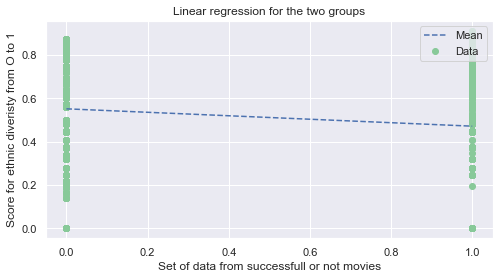

In [213]:
success_mean = []
success_mean.append(mat_data.loc[mat_data['success']==1,'simpson_index'].mean())
success_mean.append(mat_data.loc[mat_data['success']==0,'simpson_index'].mean())
plt.scatter(mat_data['success'], mat_data['simpson_index'], label='Data', marker='o',c='#88c999')
plt.plot([0,1],success_mean, label='Mean', linestyle='--')
plt.xlabel('Set of data from successfull or not movies')
plt.ylabel('Score for ethnic diveristy from O to 1')
plt.legend(loc='upper right')
plt.title('Linear regression for the two groups')
plt.show()

---
**Summary linear regression**

The intercept 0.4713 is the mean outcome for the simpson index representing diversity for famous movies (x=0). The slope 0.08 is the difference in mean outcomes between the diversity index for x=1 (non_successfull movies) and x=0. It means that for famous movies the diversity of the actors playing in it is superior by 0.08 than for actors playing in non famous movies. Thus, there is a significant difference in diversity between the two groups of movies. To validate this conclusion, we can look at the p value, which is very low. The null hypothesis is rejected: there is a significant difference in diversity for famous or non famous movies.

---

# 7-Correlation between gender and actors diversity <a name="paragraph6"></a>

## A-Vizualization of gender proportion <a name="subparagraph1"></a>

Gender as ethnicity is a big subject for the society nowedays, we will look at the ethnic diversity and if there is a difference in representation between man and female. First we will just look at a few datas on the gender and how they are represented in the datas we have. 

In [214]:
dft['gender'].value_counts()
gender=dft.loc[dft['date']<2012]

In [215]:
female_data = gender.loc[gender['gender']=='F']
male_data = gender.loc[gender['gender']=='M']

print("The dataset is composed at {} percent of men.".format(len(male_data)/(len(female_data)+len(male_data))*100))

The dataset is composed at 67.2090654647815 percent of men.


In [216]:
date_actors = gender.groupby(gender['date']).apply(lambda x: pd.Series({
        'num_of_actors': x['freebase_actor_id'].nunique(),
    }))
female = female_data.groupby(female_data['date']).apply(lambda x: pd.Series({
        'num_of_actors': x['freebase_actor_id'].nunique(),
    }))
male = male_data.groupby(male_data['date']).apply(lambda x: pd.Series({
        'num_of_actors': x['freebase_actor_id'].nunique(),
    }))

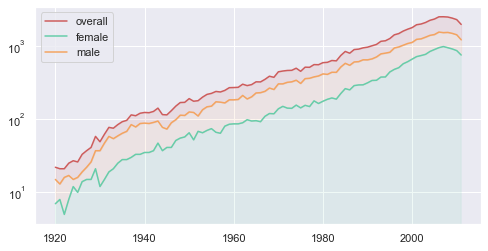

In [217]:
fig, ax = plt.subplots()
ax.plot(date_actors.index,date_actors['num_of_actors'], color='indianred', alpha=1.00,label='overall')
ax.plot(female.index,female['num_of_actors'], color='mediumaquamarine', alpha=1.00,label='female')
ax.plot(male.index,male['num_of_actors'], color='sandybrown', alpha=1.00,label='male')
ax.fill_between(date_actors.index, date_actors['num_of_actors'], male['num_of_actors'], color='indianred', alpha=.1)
ax.fill_between(date_actors.index, female['num_of_actors'], male['num_of_actors'], color='sandybrown', alpha=.1)
ax.fill_between(date_actors.index, female['num_of_actors'], 0, color='mediumaquamarine', alpha=.1)
ax.legend(['overall','female','male'])
ax.set_yscale('log')
plt.show()

Looking at the data, overall there is always more men than women actors. To have a better overview of gender representation we will more closely look at each movie and the number of men and women for each cast; we will show over time the proportionality of gender in casts. 

In [218]:
movie_data = gender.groupby(['wikipedia_id','date'],as_index=False).apply(lambda x: pd.Series({
        'female': len(x[x['gender'] == 'F'])/len(x['gender'])*100,
        'male':  len(x[x['gender'] == 'M'])/len(x['gender'])*100,
    }))

movie_data= movie_data.groupby(movie_data['date']).apply(lambda x: pd.Series({
        'avg_female': x['female'].mean(),
        'avg_male': x['male'].mean(),
    }))

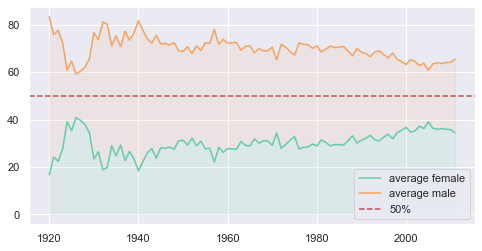

In [219]:
fig, ax = plt.subplots()
ax.plot(movie_data.index,movie_data['avg_female'], color='mediumaquamarine', alpha=1.00,label='female')
ax.plot(movie_data.index,movie_data['avg_male'], color='sandybrown', alpha=1.00,label='male')
ax.axhline(y = 50, color = 'r', linestyle = 'dashed')
ax.fill_between(movie_data.index, movie_data['avg_male'],movie_data['avg_female'], color='sandybrown', alpha=.1)
ax.fill_between(movie_data.index, movie_data['avg_female'], 0, color='mediumaquamarine', alpha=.1)
ax.legend(['average female','average male','50%'])
plt.show()

We can see a slow increase of female in movie cast, a strange data is represented around 1930, as we look in detail in the data we don't have a lot of data for this date. There is probably an explanation.

Again to see the diversity representation for the two genders we will conduct an observationnal study, we will match one female and one male actor : 
1. Match the number of movies
    ```
    First for to be fair we have to match movies by their numbers of actors, as obviously a movie with 14 actors as more chance to have a good diversity than a movie with only two actors. 
    ```

2. Match their age 
   ```
   Secondly we will match each movie by their countries movies, as some countries have diversity in actors than other (see analysis made earlier). 
    ```
3. Match the country of production 
   ```
   We will conduct this analysis only for the the biggest countries: United State, India and Europe

    ```
4. Diversity score calculation 
   ```
   We will calculate the diversity score for men and woman for each years 
   
    ```
5. T_statistic
   ```
   We will check the distribution of the diversity score (normal or not) to choose the tests we want to use 
   
    ```

In [220]:
#groupby the data by movie and date and calculate the diveristy score for each movie
gender_diversity = gender.groupby(['wikipedia_id','date'],as_index=False).apply(lambda x: pd.Series({
        'number_of_actors': len(x['freebase_actor_id']),
        'female': len(x[x['gender'] == 'F'])/len(x['gender'])*100,
        'male':  len(x[x['gender'] == 'M'])/len(x['gender'])*100,
        'simpson_index' : simpson_index(x['ethnicity'])
    }))

#remove movies with one actor or actress as there is obviously no diversity in the cast 
df2 = gender_diversity[gender_diversity.number_of_actors > 0]

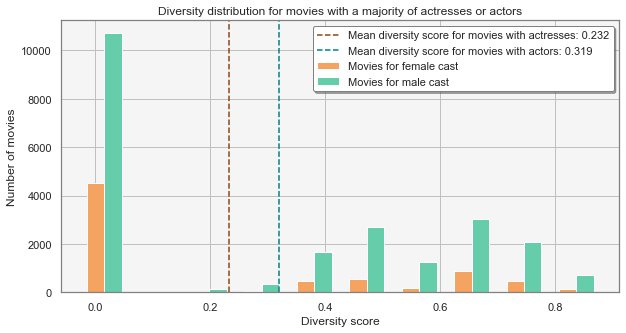

In [221]:
# plot with the proportion movies 
female_div = df2[df2 ['female']>50]
male_div = df2[df2 ['male']>50]

#np.random.seed(0)
fig, ax = plt.subplots(figsize=(10, 5))
a_heights, a_bins = np.histogram(female_div['simpson_index'])
b_heights, b_bins = np.histogram(male_div['simpson_index'], bins=a_bins)
width = (a_bins[1] - a_bins[0])/3
legend_f = 'Mean diversity score for movies with actresses: ' + str(round(female_div['simpson_index'].mean(),3))
legend_m = 'Mean diversity score for movies with actors: ' + str(round(male_div['simpson_index'].mean(),3))    
ax.bar(a_bins[:-1], a_heights, width=width, facecolor='sandybrown',label='Movies for female cast')                     
ax.axvline(female_div['simpson_index'].mean(), color='saddlebrown', linestyle='dashed', linewidth=1.5, label = legend_f)
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='mediumaquamarine',label='Movies for male cast')
ax.axvline(male_div['simpson_index'].mean(), color='teal', linestyle='dashed', linewidth=1.5,label = legend_m)

    
plt.title('Diversity distribution for movies with a majority of actresses or actors')
ax.set_ylabel('Number of movies')
ax.set_xlabel('Diversity score')
ax.grid(visible=True, color='silver')
#fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.legend(loc='upper right', facecolor='white',framealpha=1, edgecolor='0.5',shadow=True)
plt.show()

We can conclude looking at the plot that a good part of the movies have no diversity (same ethnicity for all the actors in the cast), it's more prevalant for movies with a majority of female in the cast. As a consequence the mean diversity for movies with a majority of female is lower which is interesting, we will analyse

In [222]:
# create three dataFrame for USA, Europe and India (USA and India were already created in the beginning in the notebook)
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
   'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

string = 'United Kingdom'
my_new_list = [x + string for x in europe]
df_europe= dft[dft['movie_countries'].isin(europe)]

In [223]:
# try to match an actor and an actress in the data frame 
def match_genders (data) : 
    df = data.groupby(['freebase_actor_id', 'gender','ethnicity', 'movie_countries'],as_index=False).apply(lambda x: pd.Series({
        'number_of_movies': len(x),
        'period': x['date'].mean() - (x['date'].mean() % 10),
    }))

    # Create a dataframe for female actors
    female_actors = df[df['gender'] == 'F']

    # Create a dataframe for male actors
    male_actors = df[df['gender'] == 'M']

    # Merge the two dataframes on the age and number of movies columns
    merged_df= pd.merge(female_actors, male_actors, on=['period', 'number_of_movies','movie_countries'])

    # Remove any duplicate rows
    output = merged_df.drop_duplicates(subset='freebase_actor_id_x', keep='first')
    output = output.drop_duplicates(subset='freebase_actor_id_y', keep='first')

    return output 
    

In [224]:
simpson_index(match_genders(dft)['ethnicity_x'])

0.9467199206411362

## B-T_test <a name="subparagraph2"></a>

In [225]:
mat_2 = pd.DataFrame()
mat_1 = pd.DataFrame()
mat_1['success']= matched_data['simpson_index_x']
mat_1['success']= 1
mat_2['simpson_index']= matched_data['simpson_index_y']
mat_2['success']= 0

import statsmodels.api as sm
import statsmodels.formula.api as smf

mat_data=pd.concat([mat_1, mat_2], axis=0)

mod = smf.ols(formula='simpson_index ~ success',
              data=mat_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          simpson_index   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                nan
Time:                        15:41:03   Log-Likelihood:                -113.15
No. Observations:               34970   AIC:                             228.3
Df Residuals:                   34969   BIC:                             236.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4713      0.001    363.090      0.0

/Users/melina/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning:

divide by zero encountered in double_scalars



# 8-Sentimental analysis <a name="paragraph7"></a>

## A-Score on summary <a name="subparagraph1"></a>

In [226]:
df_sent = pd.read_csv(data_folder +'plot_summaries.txt', delimiter='\t', names=['wikipedia_id', 'summary'])
df_sent.head()
from textblob import TextBlob
# Create an empty list to store the sentiment scores
sentiment_scores = []

# Loop through the movie summaries and calculate the sentiment score for each summary
for index, row in df_sent.iterrows():
    summary = row['summary']
    sentiment = TextBlob(summary).sentiment.polarity
    sentiment_scores.append(sentiment)

# Add the sentiment scores as a new column in the dataframe
df_sent['sentiment_score'] = sentiment_scores

#merge sentiment analysis df with df containing entropy score. Try to see if there is a correlation.
#Regression analysis or bootstrap mean interval on range of entropy score.

Using the sentimental analysis, we will only look at data movies with more than 4 actors in it. We will compute the diversity percentage and merge with previous `df_sent` and try to look for a relation.

In [227]:
movie_sent2 = df_country_1970[['wikipedia_id','groups','ethnicity','freebase_actor_id']]
movie_sent = movie_sent2.groupby(['wikipedia_id']).apply(lambda x: pd.Series({
        'number_of_groups': x['groups'].nunique() if x['groups'].nunique() != 0 else x['ethnicity'].nunique(),
        'number_of_actor' : x['freebase_actor_id'].nunique()
    }))
movie_sent = movie_sent[movie_sent['number_of_actor']>4]
movie_sent = movie_sent.sort_values(by = 'number_of_groups')
movie_sent 

,number_of_groups,number_of_actor
wikipedia_id,,
37476824,1,6
18454887,1,7
4696389,1,5
4702014,1,6
4705899,1,5
...,...,...
21133839,5,7
554858,5,12
1269138,5,7


In [228]:
merge_sent = pd.merge(movie_sent, df_sent[['sentiment_score','wikipedia_id']], left_on='wikipedia_id', right_on= 'wikipedia_id', how = 'left')
merge_sent = merge_sent.dropna(axis = 0)
merge_sent['number_of_groups'] = merge_sent['number_of_groups'].astype('float64')

merge_sent

,wikipedia_id,number_of_groups,number_of_actor,sentiment_score
1,18454887,1.0,7,0.033671
3,4702014,1.0,6,0.027817
4,4705899,1.0,5,0.019551
5,18394730,1.0,8,0.029139
6,4711699,1.0,6,0.221721
...,...,...,...,...
6278,21133839,5.0,7,-0.074445
6279,554858,5.0,12,0.015732
6280,1269138,5.0,7,0.024508
6281,3140828,5.0,7,0.179131


## B-Linear regression <a name="subparagraph2"></a>

In [229]:
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.ols(formula='sentiment_score ~ number_of_groups', data=merge_sent)
np.random.seed(2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     33.84
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           6.34e-09
Time:                        15:42:17   Log-Likelihood:                 4435.2
No. Observations:                5366   AIC:                            -8866.
Df Residuals:                    5364   BIC:                            -8853.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0717      0.003  

There doesn't seem to be any correlation between the sentiment and the diversity. (at least not a linear relationship).

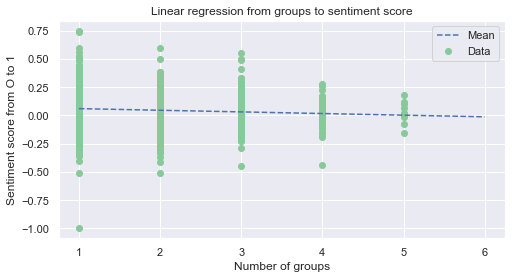

In [230]:
plt.scatter(merge_sent['number_of_groups'], merge_sent['sentiment_score'], label='Data', marker='o',c='#88c999')

plt.plot([1,6],[0.0751 - 0.0145*1,0.0751 - 0.0145*6], label='Mean', linestyle='--')
plt.xlabel('Number of groups')
plt.ylabel('Sentiment score from O to 1')
plt.legend(loc='upper right')
plt.title('Linear regression from groups to sentiment score')
plt.show()

---
**Summary linear regression**

The R-squared value of 0.008 indicates that the model explains a small portion of the variance in the dependent variable (sentiment score). The adjusted R-squared value of 0.007 is similar, and indicates that the model accounts for a small amount of the variance in the dependent variable after accounting for the number of variables in the model. The F-statistic and its corresponding p-value of 40.82 and 1.81e-10, respectively, indicate that the model as a whole is statistically significant. We can see that the mean of each groups is nearly the same. We can infer that the diversity of a movie doesn't influence the the sentiment score based on summaries (small variation. decrease by 0.0145 per unit).

---
